In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam


Using TensorFlow backend.


In [0]:
# https://medium.com/datadriveninvestor/generative-adversarial-network-gan-using-keras-ce1c05cfdfd3

In [2]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)


In [0]:
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

In [23]:
def create_generator():

  generator = Sequential()
  generator.add(Dense(units=256, input_dim=100))
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(units = 512))
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(units=1024))
  generator.add(LeakyReLU(0.2))

  generator.add(Dense(units= 784, activation='tanh'))

  generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())

  return generator 

g = create_generator()
g.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 784)              

In [25]:
def create_discriminator():

  discriminator = Sequential()

  discriminator.add(Dense(units = 1024, input_dim = 784))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))

  discriminator.add(Dense(units = 512))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout (0.3))

  discriminator.add(Dense(units=256))
  discriminator.add(LeakyReLU(0.2))

  discriminator.add(Dense(units=1, activation ='sigmoid'))

  discriminator.compile(loss='binary_crossentropy', optimizer = adam_optimizer())

  return discriminator

d= create_discriminator()
d.summary()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)              

In [14]:
def create_gan(discriminator, generator):

  discriminator.trainable = False
  gan_input = Input(shape=(100,))
  x = generator(gan_input)

  gan_output = discriminator(x)
  gan = Model(input = gan_input, output = gan_output)
  gan.compile(loss = 'binary_crossentropy', optimizer = 'adam')

  return gan

gan = create_gan(d, g)
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  


In [0]:
def plot_generated_images(epoch, generator, examples = 100, dim = (10, 10), figsize=(10, 10)):

  noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
  generated_images = generator.predict(noise)
  generated_images = generated_images.reshape(100,28,28)
  plt.figure(figsize=figsize)
  for i in range(generated_images.shape[0]):
      plt.subplot(dim[0], dim[1], i+1)
      plt.imshow(generated_images[i], interpolation='nearest')
      plt.axis('off')
  plt.tight_layout()
  plt.savefig('gan_generated_image %d.png' %epoch)



In [28]:
print (28 * 28)
X_train.shape

784


(60000, 784)

In [29]:
noise = np.random.normal(0, 1, [128, 100])
noise

array([[-1.40327294, -1.33044822, -0.44231094, ..., -0.46732826,
        -0.78079484, -0.57105623],
       [ 0.41656777, -1.57729387, -1.79513711, ...,  0.5037073 ,
         0.38351375,  0.8914062 ],
       [-0.16707962,  0.4258928 ,  1.53060396, ...,  0.9136741 ,
        -0.33822055, -0.11795652],
       ...,
       [ 0.2835553 , -0.03704169,  1.69100352, ..., -0.16728943,
        -0.17534902, -1.11717707],
       [ 1.11767668,  0.78551458, -0.88845941, ...,  1.03487858,
         0.45862251,  1.1074957 ],
       [-2.57089993, -0.99991976, -0.32714042, ...,  0.05186625,
         2.82405702,  0.35200321]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  
  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 1


  5%|▍         | 6/128 [00:00<00:02, 58.58it/s]

Epoch 2


  6%|▋         | 8/128 [00:00<00:01, 75.40it/s]

Epoch 3


  6%|▋         | 8/128 [00:00<00:01, 74.68it/s]

Epoch 4


  6%|▋         | 8/128 [00:00<00:01, 72.73it/s]

Epoch 5


  6%|▋         | 8/128 [00:00<00:01, 71.87it/s]

Epoch 6


  5%|▌         | 7/128 [00:00<00:01, 68.54it/s]

Epoch 7


  5%|▌         | 7/128 [00:00<00:01, 64.72it/s]

Epoch 8


  6%|▋         | 8/128 [00:00<00:01, 72.83it/s]

Epoch 9


  5%|▌         | 7/128 [00:00<00:01, 67.17it/s]

Epoch 10


  5%|▌         | 7/128 [00:00<00:01, 68.14it/s]

Epoch 11


  5%|▌         | 7/128 [00:00<00:01, 67.42it/s]

Epoch 12


  6%|▋         | 8/128 [00:00<00:01, 72.35it/s]

Epoch 13


  6%|▋         | 8/128 [00:00<00:01, 72.03it/s]

Epoch 14


  6%|▋         | 8/128 [00:00<00:01, 71.47it/s]

Epoch 15


  5%|▍         | 6/128 [00:00<00:02, 57.06it/s]

Epoch 16


  6%|▋         | 8/128 [00:00<00:01, 72.55it/s]

Epoch 17


  5%|▌         | 7/128 [00:00<00:01, 65.34it/s]

Epoch 18


  5%|▌         | 7/128 [00:00<00:01, 68.29it/s]

Epoch 19


  6%|▋         | 8/128 [00:00<00:01, 72.40it/s]

Epoch 20


  5%|▌         | 7/128 [00:00<00:01, 67.39it/s]

Epoch 21


  6%|▋         | 8/128 [00:00<00:01, 75.01it/s]

Epoch 22


  6%|▋         | 8/128 [00:00<00:01, 72.32it/s]

Epoch 23


  6%|▋         | 8/128 [00:00<00:01, 75.52it/s]

Epoch 24


  6%|▋         | 8/128 [00:00<00:01, 73.45it/s]

Epoch 25


  6%|▋         | 8/128 [00:00<00:01, 72.16it/s]

Epoch 26


  6%|▋         | 8/128 [00:00<00:01, 74.35it/s]

Epoch 27


  5%|▌         | 7/128 [00:00<00:01, 67.85it/s]

Epoch 28


  6%|▋         | 8/128 [00:00<00:01, 71.75it/s]

Epoch 29


  5%|▌         | 7/128 [00:00<00:01, 62.93it/s]

Epoch 30


  5%|▍         | 6/128 [00:00<00:02, 59.07it/s]

Epoch 31


  5%|▌         | 7/128 [00:00<00:01, 60.99it/s]

Epoch 32


  5%|▌         | 7/128 [00:00<00:01, 68.64it/s]

Epoch 33


  5%|▌         | 7/128 [00:00<00:01, 69.63it/s]

Epoch 34


  5%|▌         | 7/128 [00:00<00:01, 68.27it/s]

Epoch 35


  6%|▋         | 8/128 [00:00<00:01, 71.20it/s]

Epoch 36


  6%|▋         | 8/128 [00:00<00:01, 75.12it/s]

Epoch 37


  5%|▌         | 7/128 [00:00<00:01, 69.60it/s]

Epoch 38


  5%|▌         | 7/128 [00:00<00:01, 69.11it/s]

Epoch 39


  6%|▋         | 8/128 [00:00<00:01, 74.72it/s]

Epoch 40


  5%|▌         | 7/128 [00:00<00:01, 60.58it/s]

Epoch 41


  6%|▋         | 8/128 [00:00<00:01, 73.44it/s]

Epoch 42


  5%|▌         | 7/128 [00:00<00:01, 69.72it/s]

Epoch 43


  6%|▋         | 8/128 [00:00<00:01, 73.61it/s]

Epoch 44


  5%|▌         | 7/128 [00:00<00:01, 68.84it/s]

Epoch 45


  5%|▍         | 6/128 [00:00<00:02, 54.96it/s]

Epoch 46


  5%|▌         | 7/128 [00:00<00:01, 67.88it/s]

Epoch 47


  6%|▋         | 8/128 [00:00<00:01, 72.26it/s]

Epoch 48


  6%|▋         | 8/128 [00:00<00:01, 75.98it/s]

Epoch 49


  6%|▋         | 8/128 [00:00<00:01, 72.14it/s]

Epoch 50


  6%|▋         | 8/128 [00:00<00:01, 73.19it/s]

Epoch 51


  6%|▋         | 8/128 [00:00<00:01, 71.70it/s]

Epoch 52


  6%|▋         | 8/128 [00:00<00:01, 76.10it/s]

Epoch 53


  6%|▋         | 8/128 [00:00<00:01, 70.25it/s]

Epoch 54


  6%|▋         | 8/128 [00:00<00:01, 72.04it/s]

Epoch 55


  6%|▋         | 8/128 [00:00<00:01, 72.98it/s]

Epoch 56


  6%|▋         | 8/128 [00:00<00:01, 72.07it/s]

Epoch 57


  6%|▋         | 8/128 [00:00<00:01, 72.47it/s]

Epoch 58


  6%|▋         | 8/128 [00:00<00:01, 72.98it/s]

Epoch 59


  6%|▋         | 8/128 [00:00<00:01, 72.35it/s]

Epoch 60


  5%|▌         | 7/128 [00:00<00:01, 65.81it/s]

Epoch 61


  6%|▋         | 8/128 [00:00<00:01, 72.51it/s]

Epoch 62


  6%|▋         | 8/128 [00:00<00:01, 71.84it/s]

Epoch 63


  5%|▌         | 7/128 [00:00<00:01, 65.56it/s]

Epoch 64


  6%|▋         | 8/128 [00:00<00:01, 72.75it/s]

Epoch 65


  5%|▌         | 7/128 [00:00<00:01, 69.19it/s]

Epoch 66


  6%|▋         | 8/128 [00:00<00:01, 72.17it/s]

Epoch 67


  6%|▋         | 8/128 [00:00<00:01, 71.52it/s]

Epoch 68


  6%|▋         | 8/128 [00:00<00:01, 74.78it/s]

Epoch 69


  6%|▋         | 8/128 [00:00<00:01, 70.65it/s]

Epoch 70


  5%|▌         | 7/128 [00:00<00:01, 70.00it/s]

Epoch 71


  5%|▌         | 7/128 [00:00<00:01, 69.55it/s]

Epoch 72


  5%|▌         | 7/128 [00:00<00:01, 65.08it/s]

Epoch 73


  6%|▋         | 8/128 [00:00<00:01, 72.08it/s]

Epoch 74


  5%|▌         | 7/128 [00:00<00:01, 63.05it/s]

Epoch 75


  6%|▋         | 8/128 [00:00<00:01, 72.46it/s]

Epoch 76


  6%|▋         | 8/128 [00:00<00:01, 69.68it/s]

Epoch 77


  5%|▌         | 7/128 [00:00<00:01, 68.90it/s]

Epoch 78


  6%|▋         | 8/128 [00:00<00:01, 71.06it/s]

Epoch 79


  5%|▌         | 7/128 [00:00<00:01, 68.47it/s]

Epoch 80


  5%|▌         | 7/128 [00:00<00:01, 62.59it/s]

Epoch 81


  6%|▋         | 8/128 [00:00<00:01, 70.83it/s]

Epoch 82


  6%|▋         | 8/128 [00:00<00:01, 76.11it/s]

Epoch 83


  6%|▋         | 8/128 [00:00<00:01, 71.46it/s]

Epoch 84


  6%|▋         | 8/128 [00:00<00:01, 72.01it/s]

Epoch 85


  6%|▋         | 8/128 [00:00<00:01, 74.80it/s]

Epoch 86


  6%|▋         | 8/128 [00:00<00:01, 75.29it/s]

Epoch 87


  6%|▋         | 8/128 [00:00<00:01, 75.35it/s]

Epoch 88


  5%|▌         | 7/128 [00:00<00:01, 67.70it/s]

Epoch 89


  6%|▋         | 8/128 [00:00<00:01, 69.94it/s]

Epoch 90


  5%|▌         | 7/128 [00:00<00:01, 67.21it/s]

Epoch 91


  6%|▋         | 8/128 [00:00<00:01, 71.14it/s]

Epoch 92


  5%|▌         | 7/128 [00:00<00:01, 68.59it/s]

Epoch 93


  6%|▋         | 8/128 [00:00<00:01, 74.24it/s]

Epoch 94


  6%|▋         | 8/128 [00:00<00:01, 69.73it/s]

Epoch 95


  5%|▌         | 7/128 [00:00<00:01, 67.11it/s]

Epoch 96


  6%|▋         | 8/128 [00:00<00:01, 71.72it/s]

Epoch 97


  5%|▌         | 7/128 [00:00<00:01, 68.20it/s]

Epoch 98


  6%|▋         | 8/128 [00:00<00:01, 72.53it/s]

Epoch 99


  6%|▋         | 8/128 [00:00<00:01, 73.29it/s]

Epoch 100


  5%|▌         | 7/128 [00:00<00:01, 68.27it/s]

Epoch 101


  6%|▋         | 8/128 [00:00<00:01, 73.39it/s]

Epoch 102


  6%|▋         | 8/128 [00:00<00:01, 71.41it/s]

Epoch 103


  5%|▌         | 7/128 [00:00<00:01, 66.09it/s]

Epoch 104


  5%|▌         | 7/128 [00:00<00:01, 69.36it/s]

Epoch 105


  6%|▋         | 8/128 [00:00<00:01, 73.85it/s]

Epoch 106


  6%|▋         | 8/128 [00:00<00:01, 72.10it/s]

Epoch 107


  5%|▍         | 6/128 [00:00<00:02, 59.84it/s]

Epoch 108


  6%|▋         | 8/128 [00:00<00:01, 69.23it/s]

Epoch 109


  5%|▌         | 7/128 [00:00<00:01, 65.94it/s]

Epoch 110


  6%|▋         | 8/128 [00:00<00:01, 73.67it/s]

Epoch 111


  5%|▌         | 7/128 [00:00<00:01, 68.28it/s]

Epoch 112


  6%|▋         | 8/128 [00:00<00:01, 73.91it/s]

Epoch 113


  6%|▋         | 8/128 [00:00<00:01, 72.87it/s]

Epoch 114


  5%|▌         | 7/128 [00:00<00:01, 68.07it/s]

Epoch 115


  5%|▌         | 7/128 [00:00<00:01, 68.65it/s]

Epoch 116


  5%|▌         | 7/128 [00:00<00:01, 68.86it/s]

Epoch 117


  5%|▌         | 7/128 [00:00<00:01, 68.31it/s]

Epoch 118


  6%|▋         | 8/128 [00:00<00:01, 74.14it/s]

Epoch 119


  6%|▋         | 8/128 [00:00<00:01, 70.35it/s]

Epoch 120


  5%|▌         | 7/128 [00:00<00:01, 67.30it/s]

Epoch 121


  5%|▌         | 7/128 [00:00<00:01, 69.35it/s]

Epoch 122


  6%|▋         | 8/128 [00:00<00:01, 71.70it/s]

Epoch 123


  6%|▋         | 8/128 [00:00<00:01, 72.01it/s]

Epoch 124


  6%|▋         | 8/128 [00:00<00:01, 72.68it/s]

Epoch 125


  6%|▋         | 8/128 [00:00<00:01, 76.71it/s]

Epoch 126


  6%|▋         | 8/128 [00:00<00:01, 78.91it/s]

Epoch 127


  6%|▋         | 8/128 [00:00<00:01, 69.84it/s]

Epoch 128


  6%|▋         | 8/128 [00:00<00:01, 72.12it/s]

Epoch 129


  5%|▍         | 6/128 [00:00<00:02, 58.17it/s]

Epoch 130


  5%|▌         | 7/128 [00:00<00:01, 69.65it/s]

Epoch 131


  5%|▌         | 7/128 [00:00<00:01, 67.66it/s]

Epoch 132


  6%|▋         | 8/128 [00:00<00:01, 73.76it/s]

Epoch 133


  6%|▋         | 8/128 [00:00<00:01, 72.86it/s]

Epoch 134


  6%|▋         | 8/128 [00:00<00:01, 75.79it/s]

Epoch 135


  6%|▋         | 8/128 [00:00<00:01, 68.69it/s]

Epoch 136


  5%|▌         | 7/128 [00:00<00:01, 69.34it/s]

Epoch 137


  5%|▌         | 7/128 [00:00<00:01, 62.30it/s]

Epoch 138


  6%|▋         | 8/128 [00:00<00:01, 70.53it/s]

Epoch 139


  6%|▋         | 8/128 [00:00<00:01, 72.09it/s]

Epoch 140


  5%|▌         | 7/128 [00:00<00:01, 67.53it/s]

Epoch 141


  5%|▌         | 7/128 [00:00<00:01, 67.71it/s]

Epoch 142


  6%|▋         | 8/128 [00:00<00:01, 71.73it/s]

Epoch 143


  6%|▋         | 8/128 [00:00<00:01, 70.90it/s]

Epoch 144


  5%|▌         | 7/128 [00:00<00:01, 65.74it/s]

Epoch 145


  6%|▋         | 8/128 [00:00<00:01, 71.90it/s]

Epoch 146


  5%|▌         | 7/128 [00:00<00:01, 67.68it/s]

Epoch 147


  6%|▋         | 8/128 [00:00<00:01, 73.93it/s]

Epoch 148


  6%|▋         | 8/128 [00:00<00:01, 72.45it/s]

Epoch 149


  5%|▌         | 7/128 [00:00<00:01, 69.15it/s]

Epoch 150


  6%|▋         | 8/128 [00:00<00:01, 71.75it/s]

Epoch 151


  6%|▋         | 8/128 [00:00<00:01, 74.33it/s]

Epoch 152


  6%|▋         | 8/128 [00:00<00:01, 72.06it/s]

Epoch 153


  6%|▋         | 8/128 [00:00<00:01, 72.53it/s]

Epoch 154


  6%|▋         | 8/128 [00:00<00:01, 72.35it/s]

Epoch 155


  5%|▌         | 7/128 [00:00<00:01, 65.95it/s]

Epoch 156


  6%|▋         | 8/128 [00:00<00:01, 77.12it/s]

Epoch 157


  6%|▋         | 8/128 [00:00<00:01, 72.76it/s]

Epoch 158


  6%|▋         | 8/128 [00:00<00:01, 73.08it/s]

Epoch 159


  6%|▋         | 8/128 [00:00<00:01, 72.43it/s]

Epoch 160


  5%|▌         | 7/128 [00:00<00:01, 65.12it/s]

Epoch 161


  5%|▌         | 7/128 [00:00<00:01, 69.65it/s]

Epoch 162


  6%|▋         | 8/128 [00:00<00:01, 70.85it/s]

Epoch 163


  6%|▋         | 8/128 [00:00<00:01, 70.47it/s]

Epoch 164


  6%|▋         | 8/128 [00:00<00:01, 72.17it/s]

Epoch 165


  6%|▋         | 8/128 [00:00<00:01, 74.99it/s]

Epoch 166


  6%|▋         | 8/128 [00:00<00:01, 71.50it/s]

Epoch 167


  6%|▋         | 8/128 [00:00<00:01, 73.97it/s]

Epoch 168


  5%|▌         | 7/128 [00:00<00:01, 68.31it/s]

Epoch 169


  6%|▋         | 8/128 [00:00<00:01, 71.91it/s]

Epoch 170


  6%|▋         | 8/128 [00:00<00:01, 74.39it/s]

Epoch 171


  5%|▌         | 7/128 [00:00<00:01, 67.37it/s]

Epoch 172


  5%|▌         | 7/128 [00:00<00:01, 67.19it/s]

Epoch 173


  6%|▋         | 8/128 [00:00<00:01, 72.67it/s]

Epoch 174


  5%|▌         | 7/128 [00:00<00:01, 69.92it/s]

Epoch 175


  5%|▌         | 7/128 [00:00<00:01, 67.04it/s]

Epoch 176


  6%|▋         | 8/128 [00:00<00:01, 71.34it/s]

Epoch 177


  5%|▌         | 7/128 [00:00<00:01, 66.39it/s]

Epoch 178


  6%|▋         | 8/128 [00:00<00:01, 71.18it/s]

Epoch 179


  5%|▌         | 7/128 [00:00<00:01, 68.90it/s]

Epoch 180


  5%|▌         | 7/128 [00:00<00:01, 63.58it/s]

Epoch 181


  6%|▋         | 8/128 [00:00<00:01, 72.43it/s]

Epoch 182


  6%|▋         | 8/128 [00:00<00:01, 69.89it/s]

Epoch 183


  5%|▌         | 7/128 [00:00<00:01, 68.91it/s]

Epoch 184


  6%|▋         | 8/128 [00:00<00:01, 70.62it/s]

Epoch 185


  5%|▍         | 6/128 [00:00<00:02, 57.91it/s]

Epoch 186


  5%|▌         | 7/128 [00:00<00:01, 67.90it/s]

Epoch 187


  5%|▌         | 7/128 [00:00<00:01, 69.70it/s]

Epoch 188


  6%|▋         | 8/128 [00:00<00:01, 72.01it/s]

Epoch 189


  6%|▋         | 8/128 [00:00<00:01, 70.94it/s]

Epoch 190


  5%|▌         | 7/128 [00:00<00:01, 69.45it/s]

Epoch 191


  5%|▌         | 7/128 [00:00<00:01, 60.64it/s]

Epoch 192


  6%|▋         | 8/128 [00:00<00:01, 71.81it/s]

Epoch 193


  6%|▋         | 8/128 [00:00<00:01, 71.58it/s]

Epoch 194


  5%|▌         | 7/128 [00:00<00:01, 67.76it/s]

Epoch 195


  6%|▋         | 8/128 [00:00<00:01, 74.46it/s]

Epoch 196


  5%|▌         | 7/128 [00:00<00:01, 67.98it/s]

Epoch 197


  6%|▋         | 8/128 [00:00<00:01, 72.23it/s]

Epoch 198


  6%|▋         | 8/128 [00:00<00:01, 71.71it/s]

Epoch 199


  6%|▋         | 8/128 [00:00<00:01, 75.40it/s]

Epoch 200


  5%|▌         | 7/128 [00:00<00:01, 66.47it/s]

Epoch 201


  6%|▋         | 8/128 [00:00<00:01, 71.30it/s]

Epoch 202


  6%|▋         | 8/128 [00:00<00:01, 70.82it/s]

Epoch 203


  6%|▋         | 8/128 [00:00<00:01, 76.62it/s]

Epoch 204


  6%|▋         | 8/128 [00:00<00:01, 72.21it/s]

Epoch 205


  5%|▌         | 7/128 [00:00<00:01, 66.35it/s]

Epoch 206


  5%|▌         | 7/128 [00:00<00:01, 69.11it/s]

Epoch 207


  6%|▋         | 8/128 [00:00<00:01, 72.01it/s]

Epoch 208


  6%|▋         | 8/128 [00:00<00:01, 71.75it/s]

Epoch 209


  5%|▌         | 7/128 [00:00<00:01, 68.35it/s]

Epoch 210


  5%|▌         | 7/128 [00:00<00:01, 69.24it/s]

Epoch 211


  6%|▋         | 8/128 [00:00<00:01, 72.18it/s]

Epoch 212


  5%|▌         | 7/128 [00:00<00:01, 68.97it/s]

Epoch 213


  5%|▌         | 7/128 [00:00<00:01, 68.38it/s]

Epoch 214


  6%|▋         | 8/128 [00:00<00:01, 71.14it/s]

Epoch 215


  5%|▌         | 7/128 [00:00<00:01, 62.90it/s]

Epoch 216


  6%|▋         | 8/128 [00:00<00:01, 71.27it/s]

Epoch 217


  5%|▌         | 7/128 [00:00<00:01, 67.47it/s]

Epoch 218


  6%|▋         | 8/128 [00:00<00:01, 74.89it/s]

Epoch 219


  5%|▌         | 7/128 [00:00<00:01, 68.63it/s]

Epoch 220


  5%|▌         | 7/128 [00:00<00:01, 67.12it/s]

Epoch 221


  5%|▍         | 6/128 [00:00<00:02, 59.09it/s]

Epoch 222


  5%|▌         | 7/128 [00:00<00:02, 60.10it/s]

Epoch 223


  6%|▋         | 8/128 [00:00<00:01, 74.81it/s]

Epoch 224


  6%|▋         | 8/128 [00:00<00:01, 72.22it/s]

Epoch 225


  6%|▋         | 8/128 [00:00<00:01, 70.65it/s]

Epoch 226


  5%|▌         | 7/128 [00:00<00:01, 69.72it/s]

Epoch 227


  5%|▌         | 7/128 [00:00<00:01, 68.00it/s]

Epoch 228


  6%|▋         | 8/128 [00:00<00:01, 72.85it/s]

Epoch 229


  5%|▌         | 7/128 [00:00<00:01, 62.28it/s]

Epoch 230


  6%|▋         | 8/128 [00:00<00:01, 71.60it/s]

Epoch 231


  6%|▋         | 8/128 [00:00<00:01, 75.27it/s]

Epoch 232


  6%|▋         | 8/128 [00:00<00:01, 73.99it/s]

Epoch 233


  6%|▋         | 8/128 [00:00<00:01, 75.21it/s]

Epoch 234


  5%|▌         | 7/128 [00:00<00:01, 67.83it/s]

Epoch 235


  6%|▋         | 8/128 [00:00<00:01, 72.32it/s]

Epoch 236


  6%|▋         | 8/128 [00:00<00:01, 72.76it/s]

Epoch 237


  5%|▌         | 7/128 [00:00<00:01, 65.49it/s]

Epoch 238


  6%|▋         | 8/128 [00:00<00:01, 76.76it/s]

Epoch 239


  6%|▋         | 8/128 [00:00<00:01, 72.63it/s]

Epoch 240


  5%|▌         | 7/128 [00:00<00:01, 62.53it/s]

Epoch 241


  5%|▌         | 7/128 [00:00<00:01, 63.68it/s]

Epoch 242


  6%|▋         | 8/128 [00:00<00:01, 72.83it/s]

Epoch 243


  5%|▌         | 7/128 [00:00<00:01, 68.86it/s]

Epoch 244


  5%|▌         | 7/128 [00:00<00:01, 69.24it/s]

Epoch 245


  5%|▌         | 7/128 [00:00<00:01, 65.10it/s]

Epoch 246


  6%|▋         | 8/128 [00:00<00:01, 74.10it/s]

Epoch 247


  6%|▋         | 8/128 [00:00<00:01, 69.46it/s]

Epoch 248


  6%|▋         | 8/128 [00:00<00:01, 74.57it/s]

Epoch 249


  6%|▋         | 8/128 [00:00<00:01, 74.76it/s]

Epoch 250


  6%|▋         | 8/128 [00:00<00:01, 73.33it/s]

Epoch 251


  6%|▋         | 8/128 [00:00<00:01, 72.96it/s]

Epoch 252


  6%|▋         | 8/128 [00:00<00:01, 74.93it/s]

Epoch 253


  5%|▌         | 7/128 [00:00<00:01, 61.10it/s]

Epoch 254


  5%|▌         | 7/128 [00:00<00:01, 62.73it/s]

Epoch 255


  6%|▋         | 8/128 [00:00<00:01, 70.81it/s]

Epoch 256


  6%|▋         | 8/128 [00:00<00:01, 71.97it/s]

Epoch 257


  6%|▋         | 8/128 [00:00<00:01, 75.56it/s]

Epoch 258


  6%|▋         | 8/128 [00:00<00:01, 72.29it/s]

Epoch 259


  5%|▌         | 7/128 [00:00<00:01, 65.21it/s]

Epoch 260


  5%|▍         | 6/128 [00:00<00:02, 55.32it/s]

Epoch 261


  6%|▋         | 8/128 [00:00<00:01, 73.76it/s]

Epoch 262


  5%|▌         | 7/128 [00:00<00:01, 69.85it/s]

Epoch 263


  6%|▋         | 8/128 [00:00<00:01, 71.27it/s]

Epoch 264


  6%|▋         | 8/128 [00:00<00:01, 70.18it/s]

Epoch 265


  6%|▋         | 8/128 [00:00<00:01, 74.13it/s]

Epoch 266


  5%|▌         | 7/128 [00:00<00:01, 69.72it/s]

Epoch 267


  6%|▋         | 8/128 [00:00<00:01, 77.06it/s]

Epoch 268


  6%|▋         | 8/128 [00:00<00:01, 75.16it/s]

Epoch 269


  6%|▋         | 8/128 [00:00<00:01, 74.17it/s]

Epoch 270


  6%|▋         | 8/128 [00:00<00:01, 71.62it/s]

Epoch 271


  6%|▋         | 8/128 [00:00<00:01, 73.20it/s]

Epoch 272


  6%|▋         | 8/128 [00:00<00:01, 73.67it/s]

Epoch 273


  6%|▋         | 8/128 [00:00<00:01, 74.25it/s]

Epoch 274


  6%|▋         | 8/128 [00:00<00:01, 70.73it/s]

Epoch 275


  5%|▌         | 7/128 [00:00<00:01, 65.33it/s]

Epoch 276


  6%|▋         | 8/128 [00:00<00:01, 72.55it/s]

Epoch 277


  6%|▋         | 8/128 [00:00<00:01, 73.50it/s]

Epoch 278


  6%|▋         | 8/128 [00:00<00:01, 73.28it/s]

Epoch 279


  6%|▋         | 8/128 [00:00<00:01, 73.70it/s]

Epoch 280


  5%|▌         | 7/128 [00:00<00:01, 66.08it/s]

Epoch 281


  5%|▌         | 7/128 [00:00<00:01, 68.32it/s]

Epoch 282


  6%|▋         | 8/128 [00:00<00:01, 73.35it/s]

Epoch 283


  5%|▌         | 7/128 [00:00<00:01, 66.74it/s]

Epoch 284


  6%|▋         | 8/128 [00:00<00:01, 68.99it/s]

Epoch 285


  6%|▋         | 8/128 [00:00<00:01, 73.05it/s]

Epoch 286


  6%|▋         | 8/128 [00:00<00:01, 75.32it/s]

Epoch 287


  6%|▋         | 8/128 [00:00<00:01, 71.33it/s]

Epoch 288


  6%|▋         | 8/128 [00:00<00:01, 74.41it/s]

Epoch 289


  5%|▌         | 7/128 [00:00<00:01, 68.88it/s]

Epoch 290


  6%|▋         | 8/128 [00:00<00:01, 71.90it/s]

Epoch 291


  5%|▌         | 7/128 [00:00<00:01, 68.40it/s]

Epoch 292


  5%|▌         | 7/128 [00:00<00:01, 69.75it/s]

Epoch 293


  5%|▌         | 7/128 [00:00<00:01, 67.08it/s]

Epoch 294


  6%|▋         | 8/128 [00:00<00:01, 76.39it/s]

Epoch 295


  5%|▌         | 7/128 [00:00<00:01, 69.71it/s]

Epoch 296


  6%|▋         | 8/128 [00:00<00:01, 73.99it/s]

Epoch 297


  6%|▋         | 8/128 [00:00<00:01, 72.08it/s]

Epoch 298


  6%|▋         | 8/128 [00:00<00:01, 72.90it/s]

Epoch 299


  6%|▋         | 8/128 [00:00<00:01, 75.73it/s]

Epoch 300


  5%|▌         | 7/128 [00:00<00:01, 64.85it/s]

Epoch 301


  5%|▌         | 7/128 [00:00<00:01, 69.77it/s]

Epoch 302


  6%|▋         | 8/128 [00:00<00:01, 73.31it/s]

Epoch 303


  6%|▋         | 8/128 [00:00<00:01, 71.49it/s]

Epoch 304


  5%|▌         | 7/128 [00:00<00:01, 67.50it/s]

Epoch 305


  6%|▋         | 8/128 [00:00<00:01, 74.73it/s]

Epoch 306


  6%|▋         | 8/128 [00:00<00:01, 74.98it/s]

Epoch 307


  6%|▋         | 8/128 [00:00<00:01, 72.89it/s]

Epoch 308


  5%|▍         | 6/128 [00:00<00:02, 51.26it/s]

Epoch 309


  5%|▌         | 7/128 [00:00<00:01, 68.90it/s]

Epoch 310


  6%|▋         | 8/128 [00:00<00:01, 70.87it/s]

Epoch 311


  6%|▋         | 8/128 [00:00<00:01, 74.14it/s]

Epoch 312


  6%|▋         | 8/128 [00:00<00:01, 70.37it/s]

Epoch 313


  6%|▋         | 8/128 [00:00<00:01, 73.21it/s]

Epoch 314


  6%|▋         | 8/128 [00:00<00:01, 71.63it/s]

Epoch 315


  5%|▌         | 7/128 [00:00<00:01, 61.87it/s]

Epoch 316


  5%|▌         | 7/128 [00:00<00:01, 67.00it/s]

Epoch 317


  5%|▌         | 7/128 [00:00<00:01, 68.81it/s]

Epoch 318


  6%|▋         | 8/128 [00:00<00:01, 73.08it/s]

Epoch 319


  6%|▋         | 8/128 [00:00<00:01, 74.43it/s]

Epoch 320


  5%|▌         | 7/128 [00:00<00:01, 66.14it/s]

Epoch 321


  6%|▋         | 8/128 [00:00<00:01, 74.80it/s]

Epoch 322


  6%|▋         | 8/128 [00:00<00:01, 72.22it/s]

Epoch 323


  5%|▌         | 7/128 [00:00<00:01, 68.82it/s]

Epoch 324


  6%|▋         | 8/128 [00:00<00:01, 71.72it/s]

Epoch 325


  5%|▌         | 7/128 [00:00<00:01, 66.94it/s]

Epoch 326


  5%|▌         | 7/128 [00:00<00:01, 68.76it/s]

Epoch 327


  6%|▋         | 8/128 [00:00<00:01, 71.64it/s]

Epoch 328


  6%|▋         | 8/128 [00:00<00:01, 73.05it/s]

Epoch 329


  6%|▋         | 8/128 [00:00<00:01, 73.24it/s]

Epoch 330


  5%|▌         | 7/128 [00:00<00:01, 65.60it/s]

Epoch 331


  6%|▋         | 8/128 [00:00<00:01, 71.89it/s]

Epoch 332


  6%|▋         | 8/128 [00:00<00:01, 72.07it/s]

Epoch 333


  6%|▋         | 8/128 [00:00<00:01, 71.02it/s]

Epoch 334


  6%|▋         | 8/128 [00:00<00:01, 71.43it/s]

Epoch 335


  5%|▌         | 7/128 [00:00<00:01, 69.26it/s]

Epoch 336


  6%|▋         | 8/128 [00:00<00:01, 72.11it/s]

Epoch 337


  5%|▌         | 7/128 [00:00<00:01, 64.84it/s]

Epoch 338


  6%|▋         | 8/128 [00:00<00:01, 69.66it/s]

Epoch 339


  5%|▌         | 7/128 [00:00<00:01, 69.05it/s]

Epoch 340


  5%|▌         | 7/128 [00:00<00:01, 65.44it/s]

Epoch 341


  6%|▋         | 8/128 [00:00<00:01, 69.62it/s]

Epoch 342


  5%|▌         | 7/128 [00:00<00:01, 66.30it/s]

Epoch 343


  5%|▌         | 7/128 [00:00<00:01, 64.36it/s]

Epoch 344


  6%|▋         | 8/128 [00:00<00:01, 73.72it/s]

Epoch 345


  5%|▌         | 7/128 [00:00<00:01, 68.74it/s]

Epoch 346


  6%|▋         | 8/128 [00:00<00:01, 72.51it/s]

Epoch 347


  6%|▋         | 8/128 [00:00<00:01, 71.95it/s]

Epoch 348


  6%|▋         | 8/128 [00:00<00:01, 70.35it/s]

Epoch 349


  5%|▌         | 7/128 [00:00<00:01, 60.59it/s]

Epoch 350


  5%|▌         | 7/128 [00:00<00:01, 66.15it/s]

Epoch 351


  5%|▌         | 7/128 [00:00<00:01, 66.36it/s]

Epoch 352


  5%|▌         | 7/128 [00:00<00:01, 69.16it/s]

Epoch 353


  6%|▋         | 8/128 [00:00<00:01, 72.89it/s]

Epoch 354


  6%|▋         | 8/128 [00:00<00:01, 72.33it/s]

Epoch 355


  5%|▌         | 7/128 [00:00<00:01, 60.52it/s]

Epoch 356


  5%|▌         | 7/128 [00:00<00:01, 67.54it/s]

Epoch 357


  6%|▋         | 8/128 [00:00<00:01, 76.58it/s]

Epoch 358


  6%|▋         | 8/128 [00:00<00:01, 73.12it/s]

Epoch 359


  5%|▌         | 7/128 [00:00<00:01, 66.16it/s]

Epoch 360


  5%|▌         | 7/128 [00:00<00:01, 66.84it/s]

Epoch 361


  5%|▌         | 7/128 [00:00<00:01, 66.47it/s]

Epoch 362


  6%|▋         | 8/128 [00:00<00:01, 71.72it/s]

Epoch 363


  5%|▌         | 7/128 [00:00<00:01, 69.26it/s]

Epoch 364


  6%|▋         | 8/128 [00:00<00:01, 71.16it/s]

Epoch 365


  6%|▋         | 8/128 [00:00<00:01, 71.19it/s]

Epoch 366


  6%|▋         | 8/128 [00:00<00:01, 69.35it/s]

Epoch 367


  6%|▋         | 8/128 [00:00<00:01, 73.72it/s]

Epoch 368


  6%|▋         | 8/128 [00:00<00:01, 72.51it/s]

Epoch 369


  5%|▌         | 7/128 [00:00<00:01, 68.52it/s]

Epoch 370


  6%|▋         | 8/128 [00:00<00:01, 75.15it/s]

Epoch 371


  6%|▋         | 8/128 [00:00<00:01, 73.37it/s]

Epoch 372


  6%|▋         | 8/128 [00:00<00:01, 72.86it/s]

Epoch 373


  6%|▋         | 8/128 [00:00<00:01, 74.43it/s]

Epoch 374


  6%|▋         | 8/128 [00:00<00:01, 74.23it/s]

Epoch 375


  6%|▋         | 8/128 [00:00<00:01, 73.51it/s]

Epoch 376


  6%|▋         | 8/128 [00:00<00:01, 72.21it/s]

Epoch 377


  6%|▋         | 8/128 [00:00<00:01, 73.86it/s]

Epoch 378


  6%|▋         | 8/128 [00:00<00:01, 71.51it/s]

Epoch 379


  5%|▌         | 7/128 [00:00<00:01, 66.76it/s]

Epoch 380


  5%|▌         | 7/128 [00:00<00:01, 64.61it/s]

Epoch 381


  5%|▌         | 7/128 [00:00<00:01, 69.62it/s]

Epoch 382


  5%|▌         | 7/128 [00:00<00:01, 67.29it/s]

Epoch 383


  5%|▌         | 7/128 [00:00<00:01, 61.39it/s]

Epoch 384


  5%|▌         | 7/128 [00:00<00:01, 64.85it/s]

Epoch 385


  5%|▌         | 7/128 [00:00<00:01, 65.57it/s]

Epoch 386


  6%|▋         | 8/128 [00:00<00:01, 73.58it/s]

Epoch 387


  6%|▋         | 8/128 [00:00<00:01, 73.04it/s]

Epoch 388


  6%|▋         | 8/128 [00:00<00:01, 74.57it/s]

Epoch 389


  6%|▋         | 8/128 [00:00<00:01, 67.75it/s]

Epoch 390


  6%|▋         | 8/128 [00:00<00:01, 72.36it/s]

Epoch 391


  6%|▋         | 8/128 [00:00<00:01, 70.75it/s]

Epoch 392


  6%|▋         | 8/128 [00:00<00:01, 73.24it/s]

Epoch 393


  5%|▌         | 7/128 [00:00<00:01, 66.97it/s]

Epoch 394


  5%|▌         | 7/128 [00:00<00:01, 68.41it/s]

Epoch 395


  6%|▋         | 8/128 [00:00<00:01, 72.16it/s]

Epoch 396


  6%|▋         | 8/128 [00:00<00:01, 73.02it/s]

Epoch 397


  5%|▌         | 7/128 [00:00<00:01, 66.60it/s]

Epoch 398


  6%|▋         | 8/128 [00:00<00:01, 72.57it/s]

Epoch 399


  6%|▋         | 8/128 [00:00<00:01, 71.52it/s]

Epoch 400


100%|██████████| 128/128 [00:01<00:00, 70.08it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
  5%|▌         | 7/128 [00:00<00:01, 66.61it/s]

Epoch 401


  5%|▌         | 7/128 [00:00<00:01, 68.79it/s]

Epoch 402


  6%|▋         | 8/128 [00:00<00:01, 73.88it/s]

Epoch 403


  5%|▌         | 7/128 [00:00<00:01, 69.32it/s]

Epoch 404


  5%|▌         | 7/128 [00:00<00:01, 67.23it/s]

Epoch 405


  6%|▋         | 8/128 [00:00<00:01, 73.35it/s]

Epoch 406


  5%|▌         | 7/128 [00:00<00:01, 68.52it/s]

Epoch 407


  5%|▌         | 7/128 [00:00<00:01, 68.40it/s]

Epoch 408


  6%|▋         | 8/128 [00:00<00:01, 71.72it/s]

Epoch 409


  6%|▋         | 8/128 [00:00<00:01, 70.14it/s]

Epoch 410


  5%|▌         | 7/128 [00:00<00:01, 69.76it/s]

Epoch 411


  6%|▋         | 8/128 [00:00<00:01, 73.26it/s]

Epoch 412


  5%|▌         | 7/128 [00:00<00:01, 66.61it/s]

Epoch 413


  6%|▋         | 8/128 [00:00<00:01, 71.89it/s]

Epoch 414


  6%|▋         | 8/128 [00:00<00:01, 72.76it/s]

Epoch 415


  5%|▌         | 7/128 [00:00<00:01, 68.37it/s]

Epoch 416


  6%|▋         | 8/128 [00:00<00:01, 71.27it/s]

Epoch 417


  5%|▌         | 7/128 [00:00<00:01, 67.83it/s]

Epoch 418


  6%|▋         | 8/128 [00:00<00:01, 73.70it/s]

Epoch 419


  6%|▋         | 8/128 [00:00<00:01, 71.46it/s]

Epoch 420


  5%|▌         | 7/128 [00:00<00:01, 66.30it/s]

Epoch 421


  6%|▋         | 8/128 [00:00<00:01, 74.53it/s]

Epoch 422


  6%|▋         | 8/128 [00:00<00:01, 71.79it/s]

Epoch 423


  6%|▋         | 8/128 [00:00<00:01, 72.48it/s]

Epoch 424


  6%|▋         | 8/128 [00:00<00:01, 73.46it/s]

Epoch 425


  5%|▌         | 7/128 [00:00<00:01, 65.24it/s]

Epoch 426


  6%|▋         | 8/128 [00:00<00:01, 74.14it/s]

Epoch 427


  6%|▋         | 8/128 [00:00<00:01, 70.49it/s]

Epoch 428


  6%|▋         | 8/128 [00:00<00:01, 72.45it/s]

Epoch 429


  6%|▋         | 8/128 [00:00<00:01, 72.72it/s]

Epoch 430


  5%|▌         | 7/128 [00:00<00:01, 69.35it/s]

Epoch 431


  6%|▋         | 8/128 [00:00<00:01, 74.11it/s]

Epoch 432


  5%|▌         | 7/128 [00:00<00:01, 68.23it/s]

Epoch 433


  6%|▋         | 8/128 [00:00<00:01, 77.24it/s]

Epoch 434


  5%|▌         | 7/128 [00:00<00:01, 69.48it/s]

Epoch 435


  6%|▋         | 8/128 [00:00<00:01, 72.29it/s]

Epoch 436


  6%|▋         | 8/128 [00:00<00:01, 72.21it/s]

Epoch 437


  6%|▋         | 8/128 [00:00<00:01, 71.79it/s]

Epoch 438


  5%|▌         | 7/128 [00:00<00:01, 68.52it/s]

Epoch 439


  5%|▌         | 7/128 [00:00<00:01, 60.96it/s]

Epoch 440


  6%|▋         | 8/128 [00:00<00:01, 70.34it/s]

Epoch 441


  6%|▋         | 8/128 [00:00<00:01, 73.46it/s]

Epoch 442


  6%|▋         | 8/128 [00:00<00:01, 71.65it/s]

Epoch 443


  6%|▋         | 8/128 [00:00<00:01, 71.52it/s]

Epoch 444


  5%|▌         | 7/128 [00:00<00:01, 66.83it/s]

Epoch 445


  6%|▋         | 8/128 [00:00<00:01, 68.05it/s]

Epoch 446


  6%|▋         | 8/128 [00:00<00:01, 73.61it/s]

Epoch 447


  5%|▌         | 7/128 [00:00<00:01, 68.17it/s]

Epoch 448


  6%|▋         | 8/128 [00:00<00:01, 73.92it/s]

Epoch 449


  5%|▌         | 7/128 [00:00<00:01, 61.73it/s]

Epoch 450


  6%|▋         | 8/128 [00:00<00:01, 71.51it/s]

Epoch 451


  6%|▋         | 8/128 [00:00<00:01, 70.56it/s]

Epoch 452


  6%|▋         | 8/128 [00:00<00:01, 71.15it/s]

Epoch 453


  6%|▋         | 8/128 [00:00<00:01, 71.70it/s]

Epoch 454


  6%|▋         | 8/128 [00:00<00:01, 70.55it/s]

Epoch 455


  6%|▋         | 8/128 [00:00<00:01, 72.94it/s]

Epoch 456


  5%|▌         | 7/128 [00:00<00:01, 68.22it/s]

Epoch 457


  6%|▋         | 8/128 [00:00<00:01, 71.91it/s]

Epoch 458


  6%|▋         | 8/128 [00:00<00:01, 71.17it/s]

Epoch 459


  6%|▋         | 8/128 [00:00<00:01, 77.16it/s]

Epoch 460


  5%|▌         | 7/128 [00:00<00:01, 63.27it/s]

Epoch 461


  5%|▌         | 7/128 [00:00<00:01, 67.01it/s]

Epoch 462


  6%|▋         | 8/128 [00:00<00:01, 72.11it/s]

Epoch 463


  5%|▌         | 7/128 [00:00<00:01, 67.43it/s]

Epoch 464


  6%|▋         | 8/128 [00:00<00:01, 73.74it/s]

Epoch 465


  5%|▌         | 7/128 [00:00<00:01, 67.53it/s]

Epoch 466


  5%|▌         | 7/128 [00:00<00:01, 66.82it/s]

Epoch 467


  6%|▋         | 8/128 [00:00<00:01, 74.62it/s]

Epoch 468


  5%|▌         | 7/128 [00:00<00:01, 65.21it/s]

Epoch 469


  6%|▋         | 8/128 [00:00<00:01, 70.83it/s]

Epoch 470


  5%|▌         | 7/128 [00:00<00:02, 60.45it/s]

Epoch 471


  5%|▌         | 7/128 [00:00<00:01, 63.11it/s]

Epoch 472


  6%|▋         | 8/128 [00:00<00:01, 70.52it/s]

Epoch 473


  5%|▌         | 7/128 [00:00<00:01, 69.32it/s]

Epoch 474


  6%|▋         | 8/128 [00:00<00:01, 73.12it/s]

Epoch 475


  5%|▌         | 7/128 [00:00<00:01, 68.86it/s]

Epoch 476


  6%|▋         | 8/128 [00:00<00:01, 71.13it/s]

Epoch 477


  6%|▋         | 8/128 [00:00<00:01, 70.67it/s]

Epoch 478


  5%|▌         | 7/128 [00:00<00:01, 61.32it/s]

Epoch 479


  5%|▌         | 7/128 [00:00<00:01, 68.18it/s]

Epoch 480


  5%|▌         | 7/128 [00:00<00:01, 62.22it/s]

Epoch 481


  5%|▌         | 7/128 [00:00<00:01, 68.47it/s]

Epoch 482


  6%|▋         | 8/128 [00:00<00:01, 70.90it/s]

Epoch 483


  6%|▋         | 8/128 [00:00<00:01, 71.56it/s]

Epoch 484


  6%|▋         | 8/128 [00:00<00:01, 73.80it/s]

Epoch 485


  6%|▋         | 8/128 [00:00<00:01, 72.46it/s]

Epoch 486


  6%|▋         | 8/128 [00:00<00:01, 70.47it/s]

Epoch 487


  6%|▋         | 8/128 [00:00<00:01, 71.14it/s]

Epoch 488


  6%|▋         | 8/128 [00:00<00:01, 71.03it/s]

Epoch 489


  5%|▌         | 7/128 [00:00<00:01, 66.08it/s]

Epoch 490


  6%|▋         | 8/128 [00:00<00:01, 74.23it/s]

Epoch 491


  6%|▋         | 8/128 [00:00<00:01, 70.89it/s]

Epoch 492


  6%|▋         | 8/128 [00:00<00:01, 71.06it/s]

Epoch 493


  5%|▌         | 7/128 [00:00<00:01, 69.08it/s]

Epoch 494


  6%|▋         | 8/128 [00:00<00:01, 71.79it/s]

Epoch 495


  5%|▌         | 7/128 [00:00<00:01, 68.21it/s]

Epoch 496


  6%|▋         | 8/128 [00:00<00:01, 74.92it/s]

Epoch 497


  6%|▋         | 8/128 [00:00<00:01, 72.68it/s]

Epoch 498


  5%|▌         | 7/128 [00:00<00:01, 67.84it/s]

Epoch 499


  5%|▌         | 7/128 [00:00<00:01, 68.75it/s]

Epoch 500


  5%|▌         | 7/128 [00:00<00:01, 65.71it/s]

Epoch 501


  5%|▌         | 7/128 [00:00<00:01, 65.74it/s]

Epoch 502


  6%|▋         | 8/128 [00:00<00:01, 71.47it/s]

Epoch 503


  5%|▌         | 7/128 [00:00<00:01, 61.78it/s]

Epoch 504


  5%|▌         | 7/128 [00:00<00:01, 68.20it/s]

Epoch 505


  6%|▋         | 8/128 [00:00<00:01, 69.47it/s]

Epoch 506


  6%|▋         | 8/128 [00:00<00:01, 72.55it/s]

Epoch 507


  5%|▌         | 7/128 [00:00<00:01, 68.29it/s]

Epoch 508


  5%|▌         | 7/128 [00:00<00:01, 67.70it/s]

Epoch 509


  5%|▌         | 7/128 [00:00<00:01, 65.46it/s]

Epoch 510


  5%|▌         | 7/128 [00:00<00:01, 69.59it/s]

Epoch 511


  6%|▋         | 8/128 [00:00<00:01, 70.41it/s]

Epoch 512


  6%|▋         | 8/128 [00:00<00:01, 71.84it/s]

Epoch 513


  6%|▋         | 8/128 [00:00<00:01, 71.42it/s]

Epoch 514


  5%|▌         | 7/128 [00:00<00:01, 69.81it/s]

Epoch 515


  6%|▋         | 8/128 [00:00<00:01, 71.41it/s]

Epoch 516


  5%|▌         | 7/128 [00:00<00:01, 64.03it/s]

Epoch 517


  6%|▋         | 8/128 [00:00<00:01, 69.29it/s]

Epoch 518


  6%|▋         | 8/128 [00:00<00:01, 70.08it/s]

Epoch 519


  6%|▋         | 8/128 [00:00<00:01, 72.63it/s]

Epoch 520


  5%|▍         | 6/128 [00:00<00:02, 58.08it/s]

Epoch 521


  5%|▌         | 7/128 [00:00<00:01, 69.96it/s]

Epoch 522


  6%|▋         | 8/128 [00:00<00:01, 75.68it/s]

Epoch 523


  6%|▋         | 8/128 [00:00<00:01, 73.95it/s]

Epoch 524


  6%|▋         | 8/128 [00:00<00:01, 71.83it/s]

Epoch 525


  5%|▌         | 7/128 [00:00<00:01, 69.25it/s]

Epoch 526


  6%|▋         | 8/128 [00:00<00:01, 71.08it/s]

Epoch 527


  5%|▌         | 7/128 [00:00<00:01, 68.43it/s]

Epoch 528


  6%|▋         | 8/128 [00:00<00:01, 70.22it/s]

Epoch 529


  5%|▌         | 7/128 [00:00<00:01, 65.74it/s]

Epoch 530


  5%|▌         | 7/128 [00:00<00:01, 68.51it/s]

Epoch 531


  5%|▌         | 7/128 [00:00<00:01, 62.55it/s]

Epoch 532


  6%|▋         | 8/128 [00:00<00:01, 70.66it/s]

Epoch 533


  6%|▋         | 8/128 [00:00<00:01, 67.42it/s]

Epoch 534


  6%|▋         | 8/128 [00:00<00:01, 72.31it/s]

Epoch 535


  6%|▋         | 8/128 [00:00<00:01, 73.30it/s]

Epoch 536


  6%|▋         | 8/128 [00:00<00:01, 71.78it/s]

Epoch 537


  5%|▌         | 7/128 [00:00<00:01, 67.35it/s]

Epoch 538


  6%|▋         | 8/128 [00:00<00:01, 72.38it/s]

Epoch 539


  5%|▍         | 6/128 [00:00<00:02, 59.48it/s]

Epoch 540


  5%|▌         | 7/128 [00:00<00:01, 65.71it/s]

Epoch 541


  6%|▋         | 8/128 [00:00<00:01, 70.36it/s]

Epoch 542


  5%|▌         | 7/128 [00:00<00:01, 68.77it/s]

Epoch 543


  6%|▋         | 8/128 [00:00<00:01, 70.62it/s]

Epoch 544


  6%|▋         | 8/128 [00:00<00:01, 70.41it/s]

Epoch 545


  6%|▋         | 8/128 [00:00<00:01, 71.97it/s]

Epoch 546


  6%|▋         | 8/128 [00:00<00:01, 73.19it/s]

Epoch 547


  5%|▌         | 7/128 [00:00<00:01, 68.86it/s]

Epoch 548


  6%|▋         | 8/128 [00:00<00:01, 75.04it/s]

Epoch 549


  5%|▌         | 7/128 [00:00<00:01, 68.06it/s]

Epoch 550


  6%|▋         | 8/128 [00:00<00:01, 71.94it/s]

Epoch 551


  6%|▋         | 8/128 [00:00<00:01, 72.65it/s]

Epoch 552


  6%|▋         | 8/128 [00:00<00:01, 71.90it/s]

Epoch 553


  6%|▋         | 8/128 [00:00<00:01, 74.04it/s]

Epoch 554


  6%|▋         | 8/128 [00:00<00:01, 74.10it/s]

Epoch 555


  6%|▋         | 8/128 [00:00<00:01, 77.05it/s]

Epoch 556


  5%|▌         | 7/128 [00:00<00:01, 69.26it/s]

Epoch 557


  5%|▌         | 7/128 [00:00<00:01, 68.29it/s]

Epoch 558


  6%|▋         | 8/128 [00:00<00:01, 73.54it/s]

Epoch 559


  6%|▋         | 8/128 [00:00<00:01, 71.55it/s]

Epoch 560


  5%|▌         | 7/128 [00:00<00:01, 65.02it/s]

Epoch 561


  6%|▋         | 8/128 [00:00<00:01, 75.96it/s]

Epoch 562


  6%|▋         | 8/128 [00:00<00:01, 73.10it/s]

Epoch 563


  5%|▌         | 7/128 [00:00<00:01, 64.50it/s]

Epoch 564


  6%|▋         | 8/128 [00:00<00:01, 72.01it/s]

Epoch 565


  5%|▌         | 7/128 [00:00<00:01, 69.24it/s]

Epoch 566


  5%|▌         | 7/128 [00:00<00:01, 63.88it/s]

Epoch 567


  6%|▋         | 8/128 [00:00<00:01, 71.37it/s]

Epoch 568


  5%|▌         | 7/128 [00:00<00:01, 67.24it/s]

Epoch 569


  6%|▋         | 8/128 [00:00<00:01, 73.47it/s]

Epoch 570


  6%|▋         | 8/128 [00:00<00:01, 73.79it/s]

Epoch 571


  5%|▌         | 7/128 [00:00<00:01, 64.86it/s]

Epoch 572


  5%|▌         | 7/128 [00:00<00:01, 66.87it/s]

Epoch 573


  6%|▋         | 8/128 [00:00<00:01, 71.82it/s]

Epoch 574


  6%|▋         | 8/128 [00:00<00:01, 72.53it/s]

Epoch 575


  6%|▋         | 8/128 [00:00<00:01, 73.19it/s]

Epoch 576


  6%|▋         | 8/128 [00:00<00:01, 71.17it/s]

Epoch 577


  5%|▌         | 7/128 [00:00<00:01, 66.48it/s]

Epoch 578


  6%|▋         | 8/128 [00:00<00:01, 70.86it/s]

Epoch 579


  6%|▋         | 8/128 [00:00<00:01, 74.15it/s]

Epoch 580


  5%|▌         | 7/128 [00:00<00:01, 62.94it/s]

Epoch 581


  6%|▋         | 8/128 [00:00<00:01, 71.34it/s]

Epoch 582


  6%|▋         | 8/128 [00:00<00:01, 72.48it/s]

Epoch 583


  6%|▋         | 8/128 [00:00<00:01, 72.13it/s]

Epoch 584


  6%|▋         | 8/128 [00:00<00:01, 73.97it/s]

Epoch 585


  6%|▋         | 8/128 [00:00<00:01, 74.99it/s]

Epoch 586


  6%|▋         | 8/128 [00:00<00:01, 74.75it/s]

Epoch 587


  6%|▋         | 8/128 [00:00<00:01, 71.33it/s]

Epoch 588


  6%|▋         | 8/128 [00:00<00:01, 75.25it/s]

Epoch 589


  6%|▋         | 8/128 [00:00<00:01, 73.17it/s]

Epoch 590


  5%|▌         | 7/128 [00:00<00:01, 64.97it/s]

Epoch 591


  5%|▌         | 7/128 [00:00<00:01, 67.43it/s]

Epoch 592


  6%|▋         | 8/128 [00:00<00:01, 73.53it/s]

Epoch 593


  5%|▌         | 7/128 [00:00<00:01, 68.13it/s]

Epoch 594


  6%|▋         | 8/128 [00:00<00:01, 70.05it/s]

Epoch 595


  5%|▌         | 7/128 [00:00<00:01, 69.61it/s]

Epoch 596


  6%|▋         | 8/128 [00:00<00:01, 70.90it/s]

Epoch 597


  6%|▋         | 8/128 [00:00<00:01, 72.09it/s]

Epoch 598


  6%|▋         | 8/128 [00:00<00:01, 72.15it/s]

Epoch 599


  6%|▋         | 8/128 [00:00<00:01, 71.99it/s]

Epoch 600


100%|██████████| 128/128 [00:01<00:00, 70.55it/s]


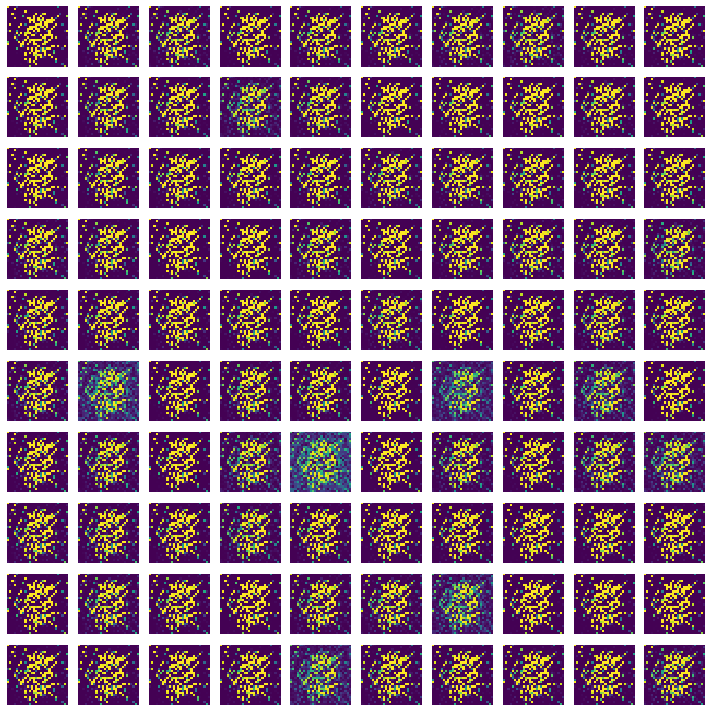

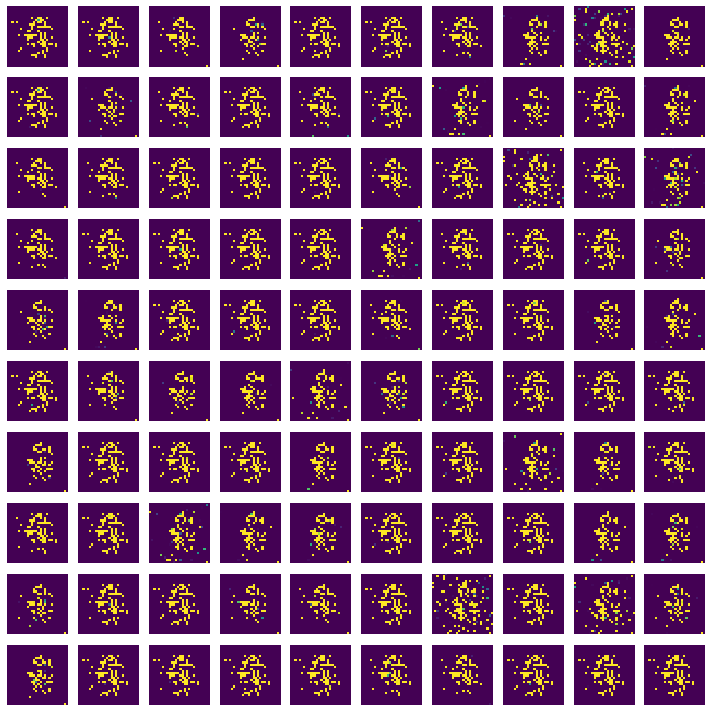

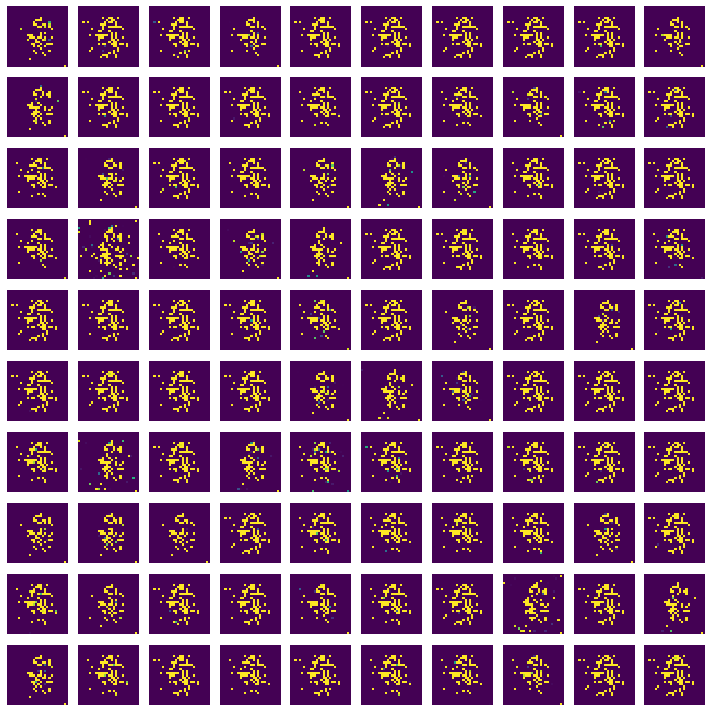

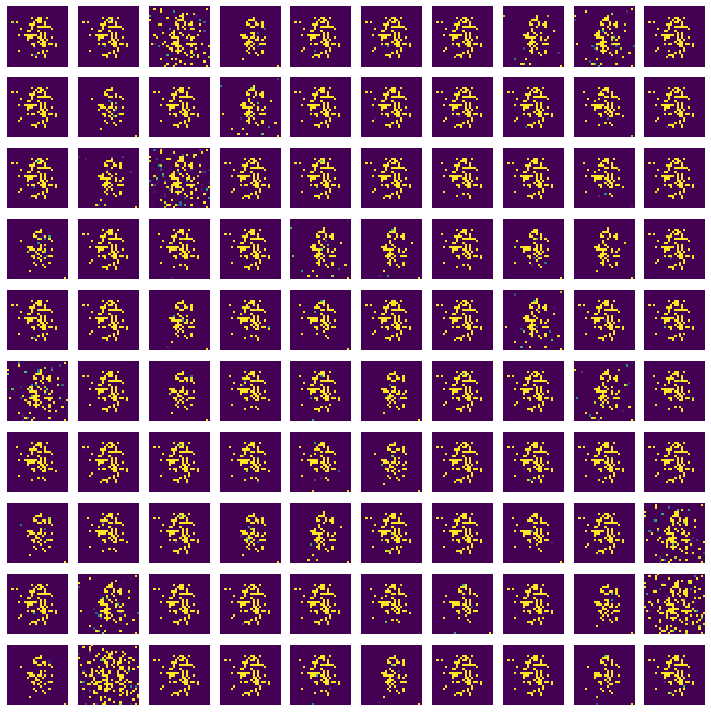

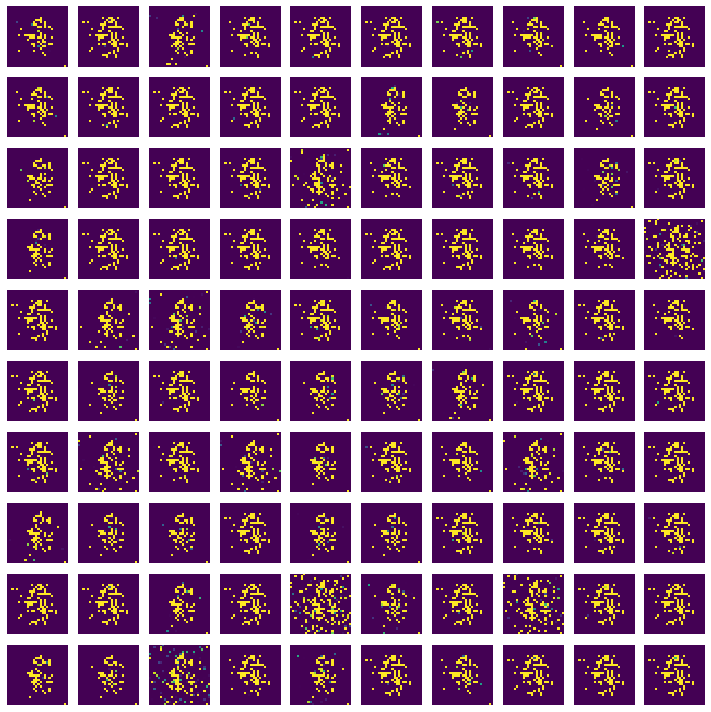

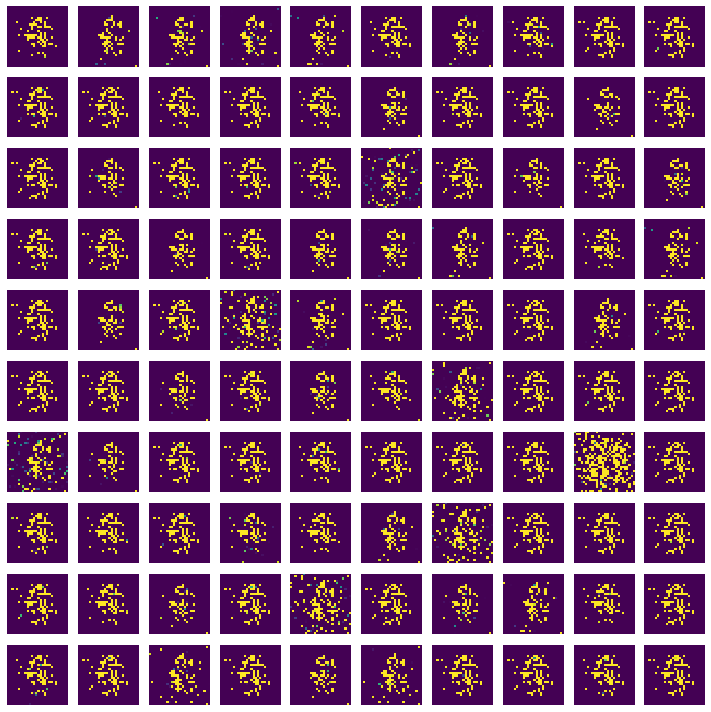

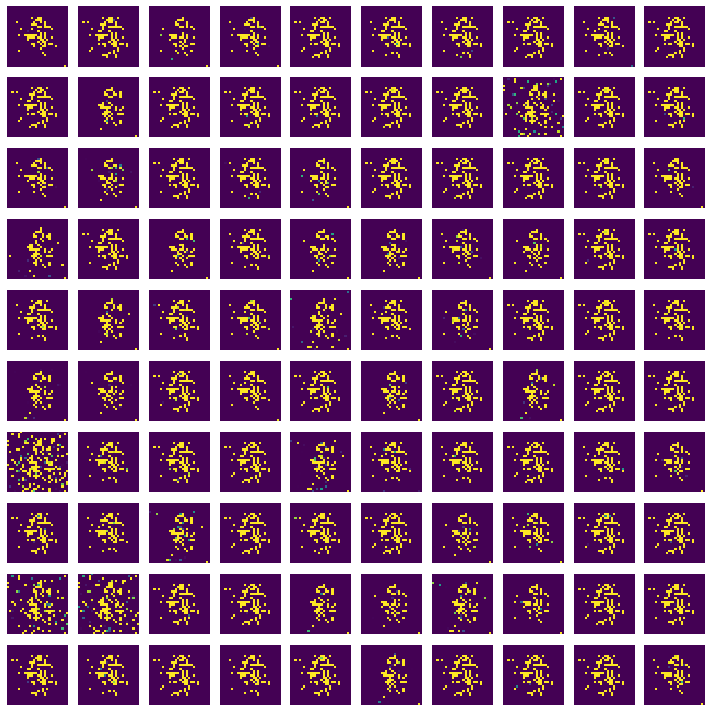

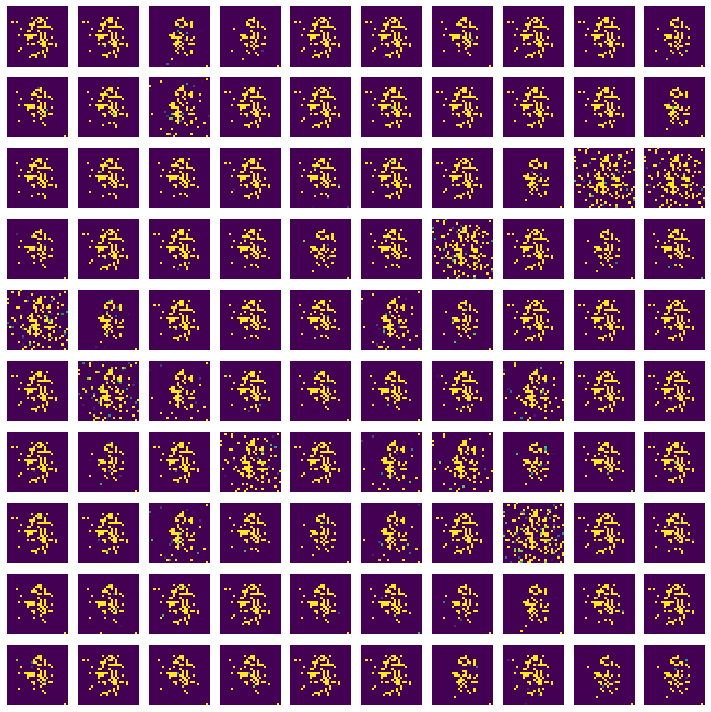

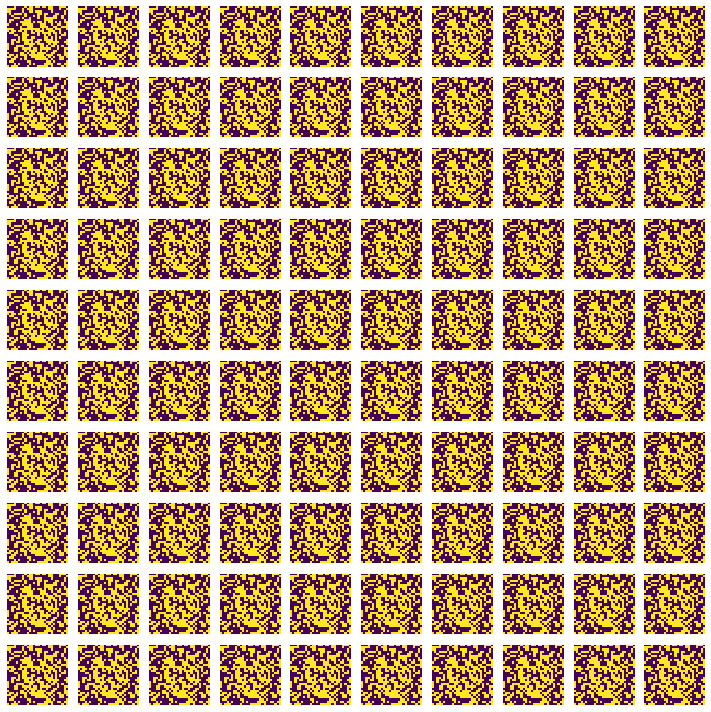

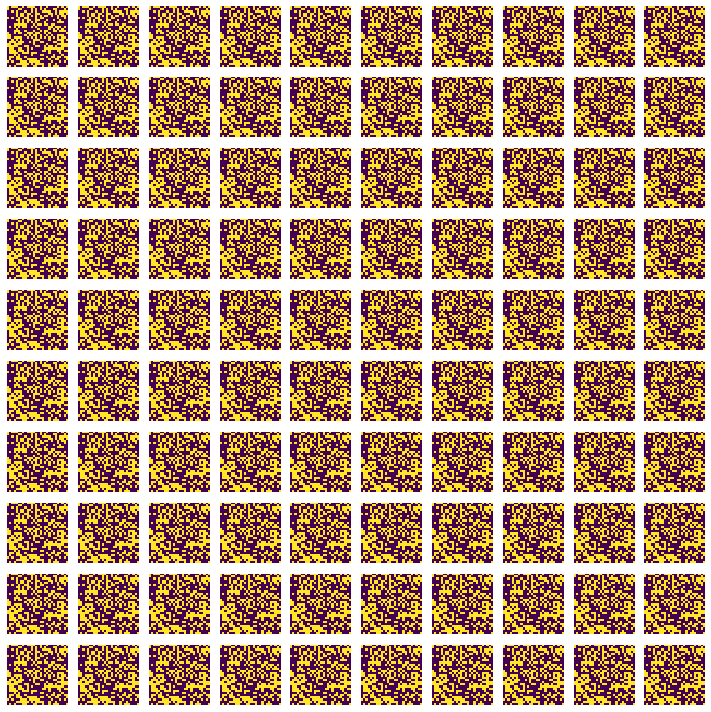

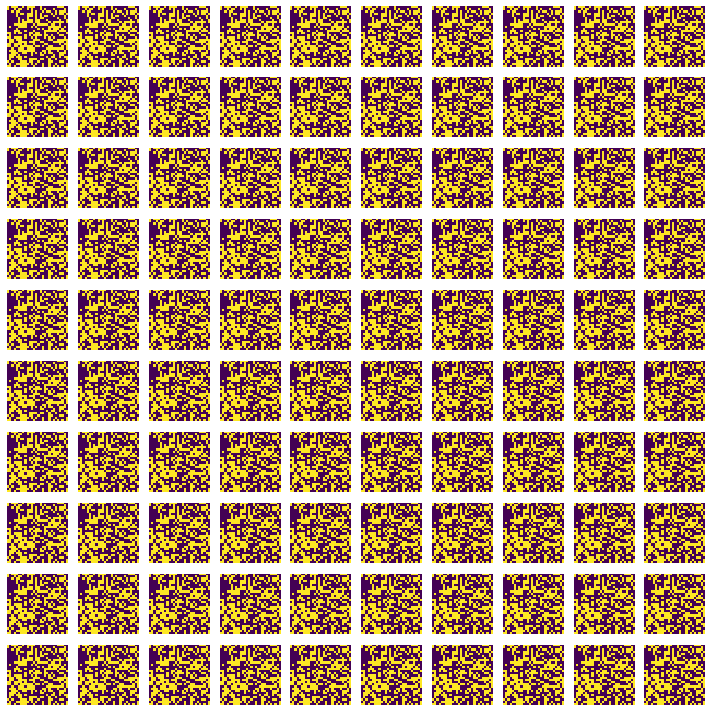

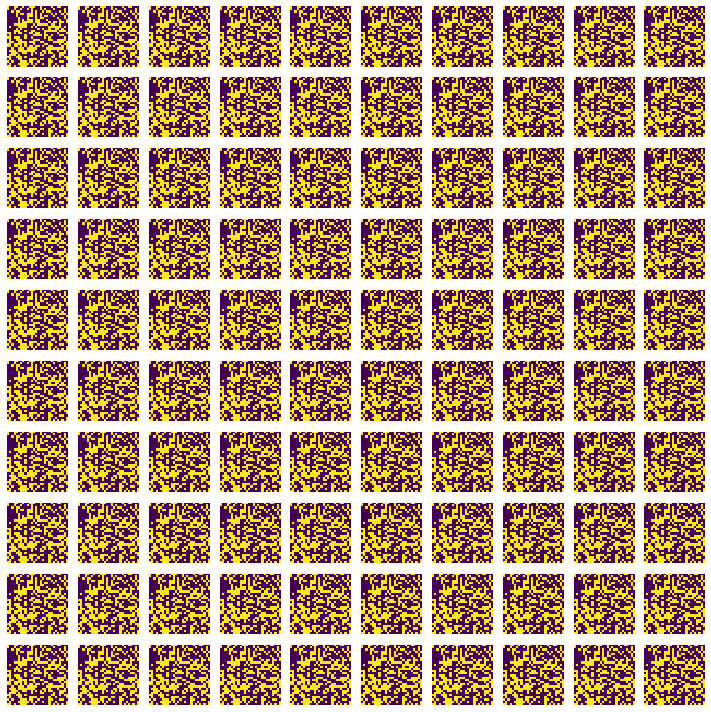

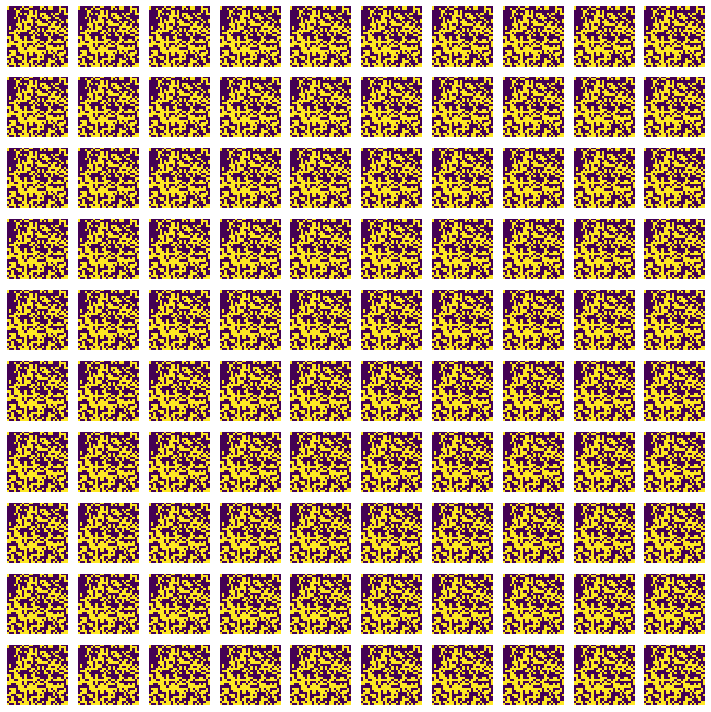

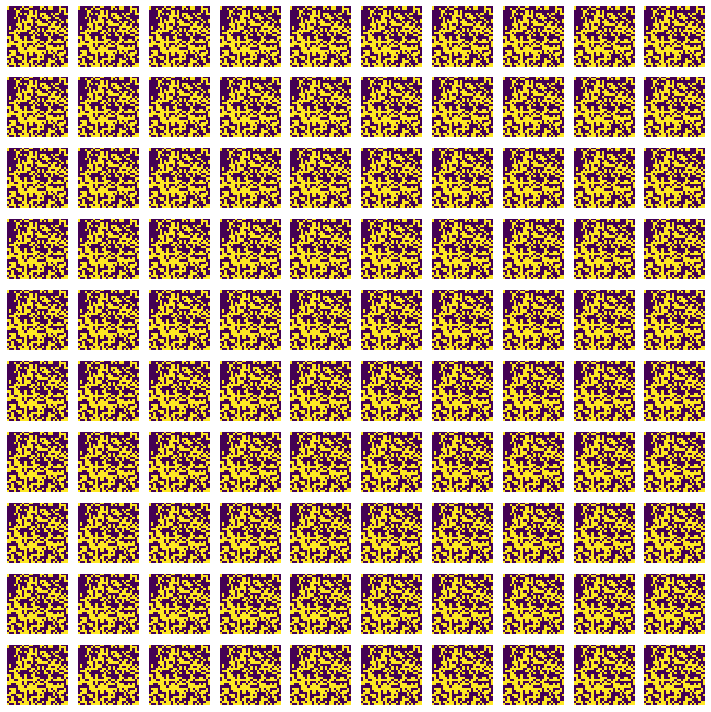

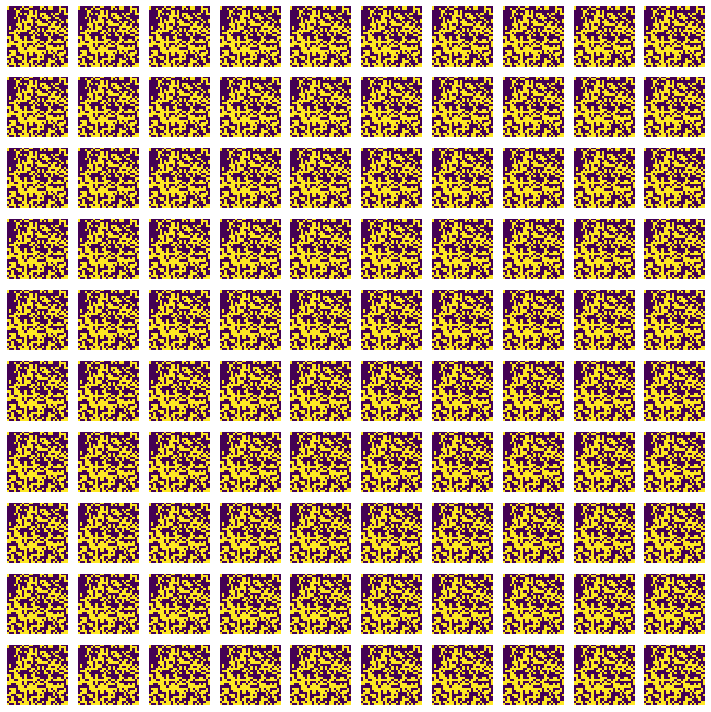

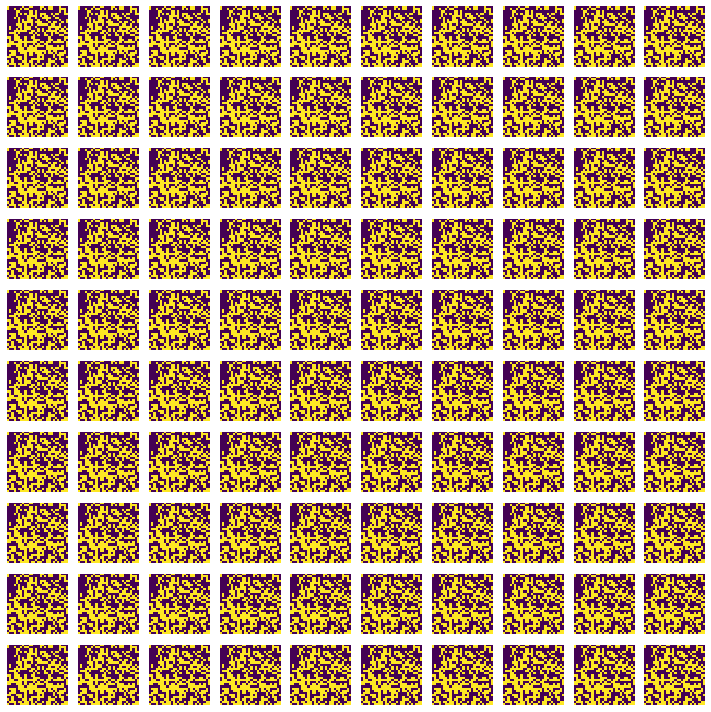

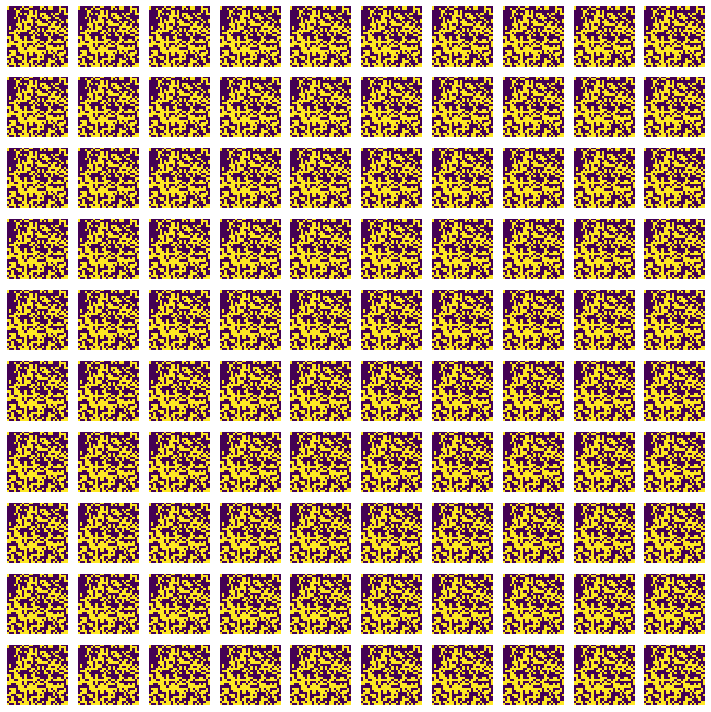

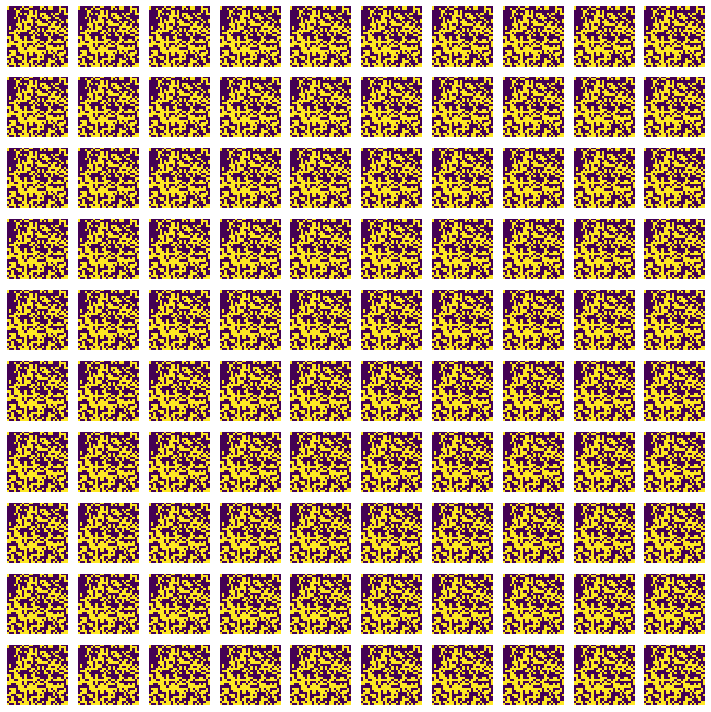

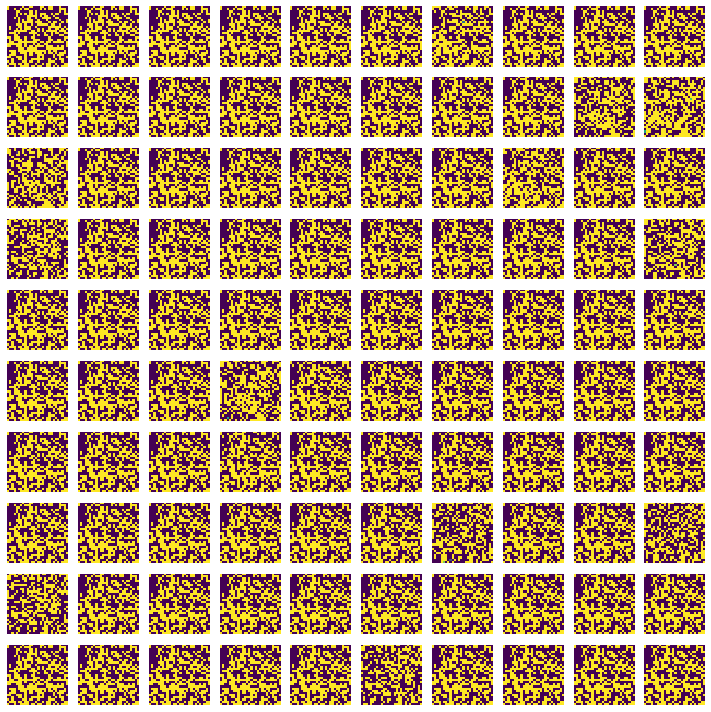

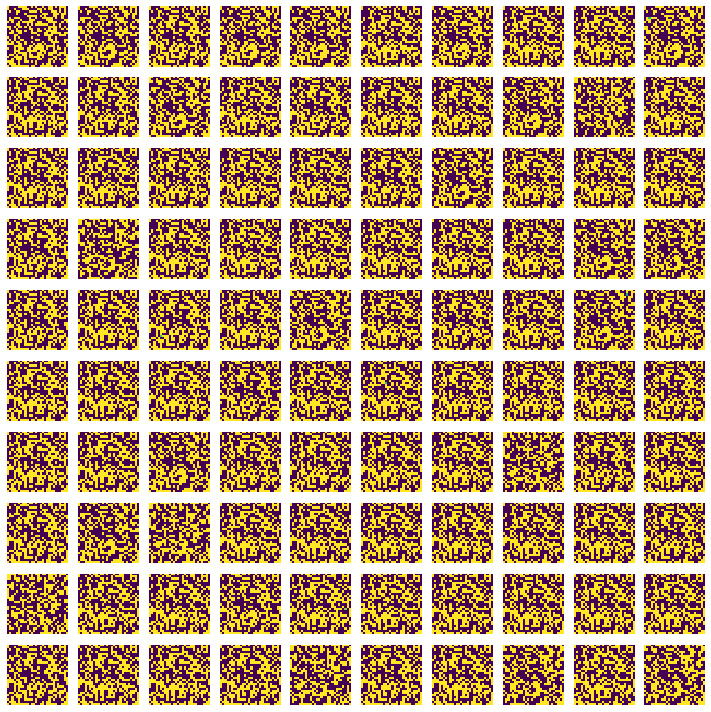

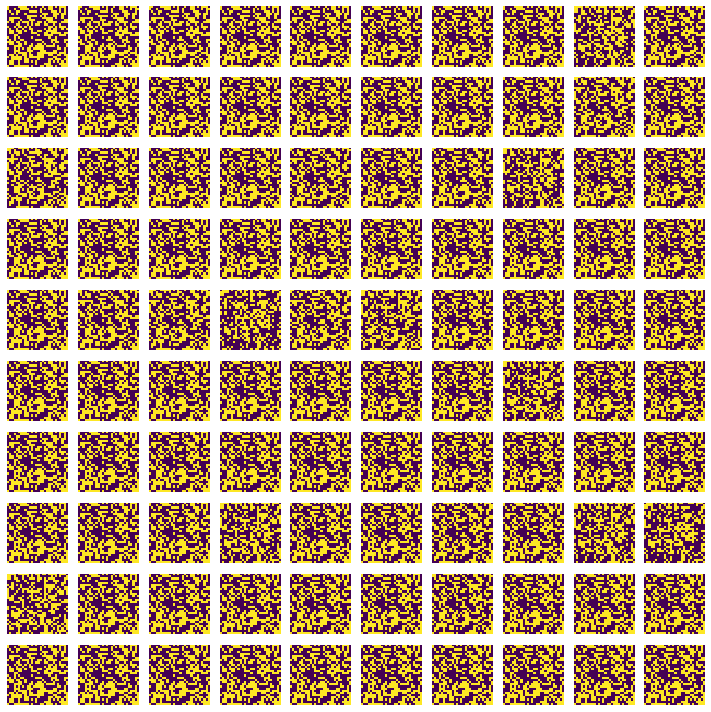

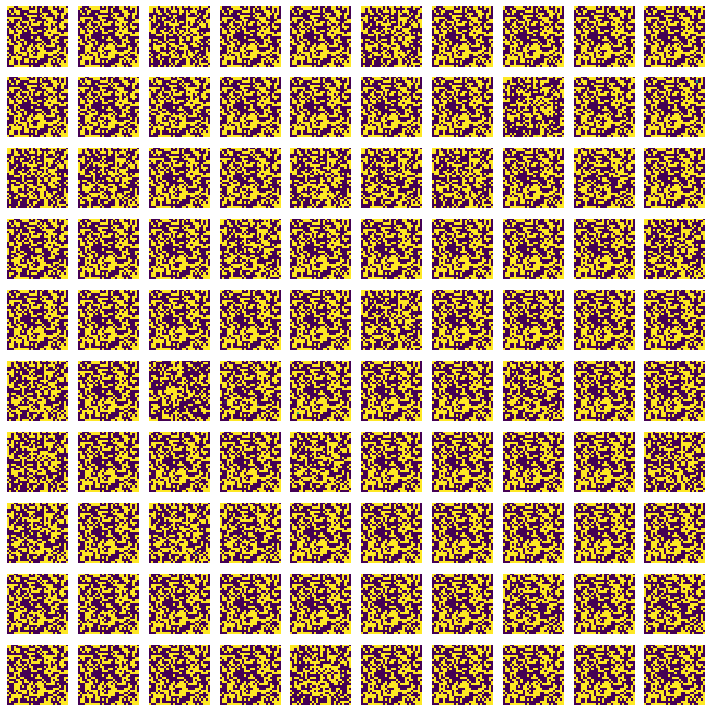

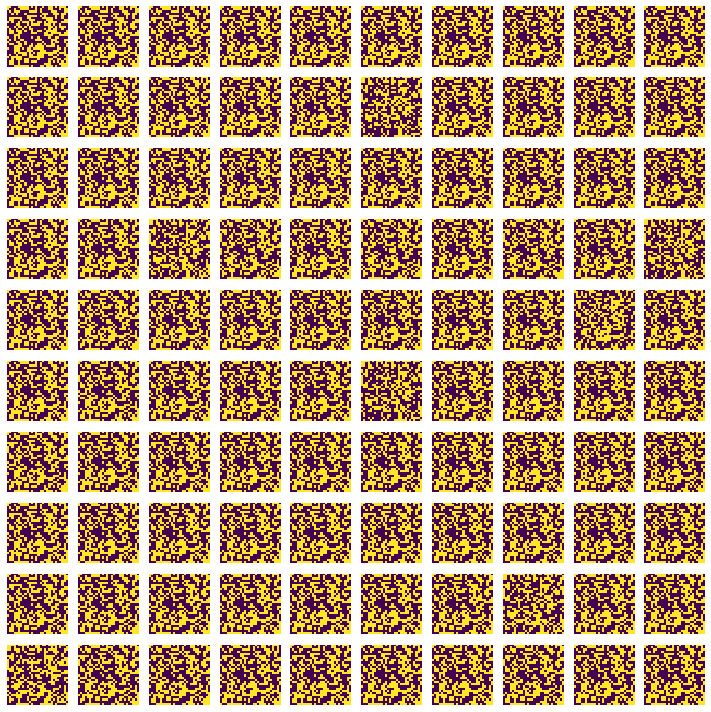

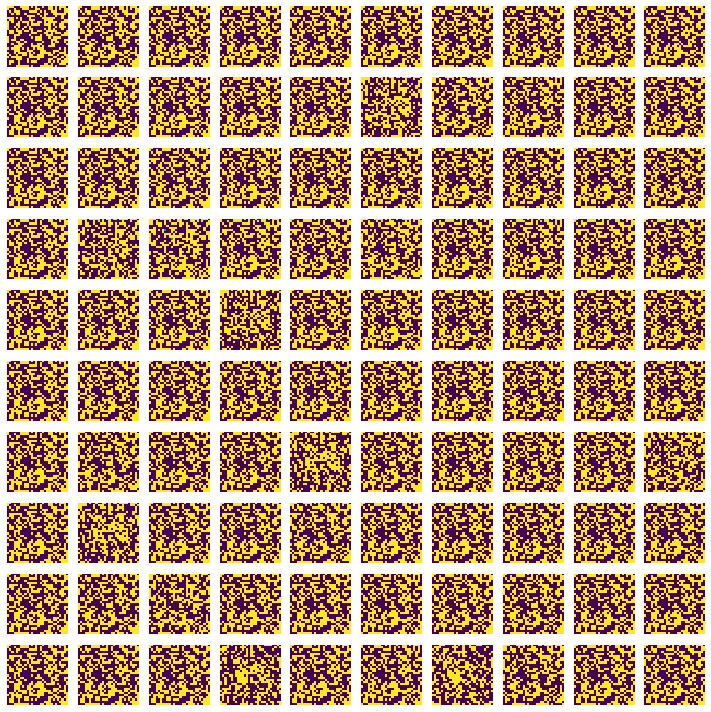

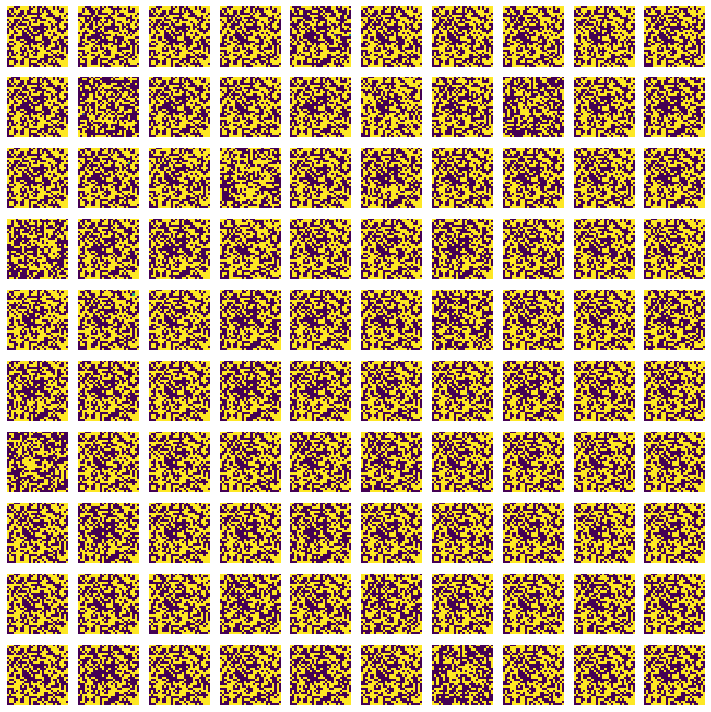

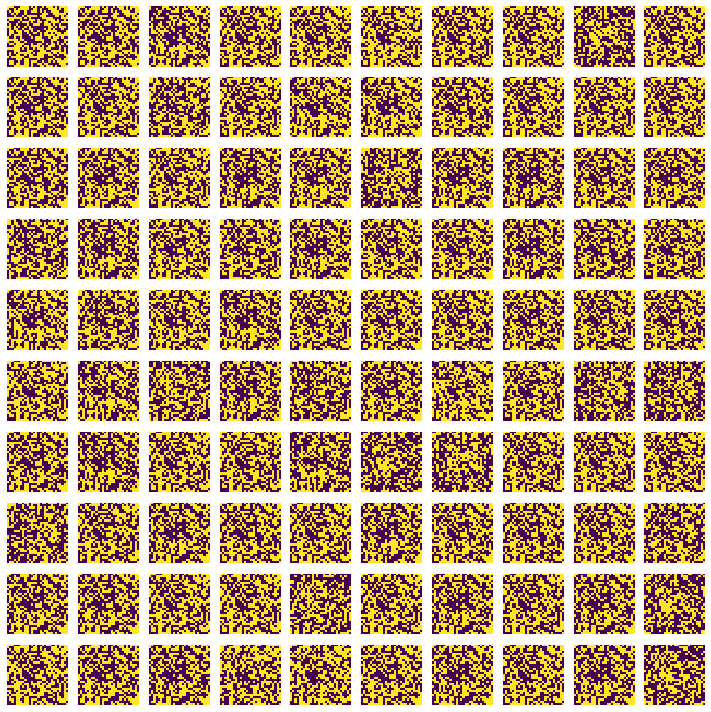

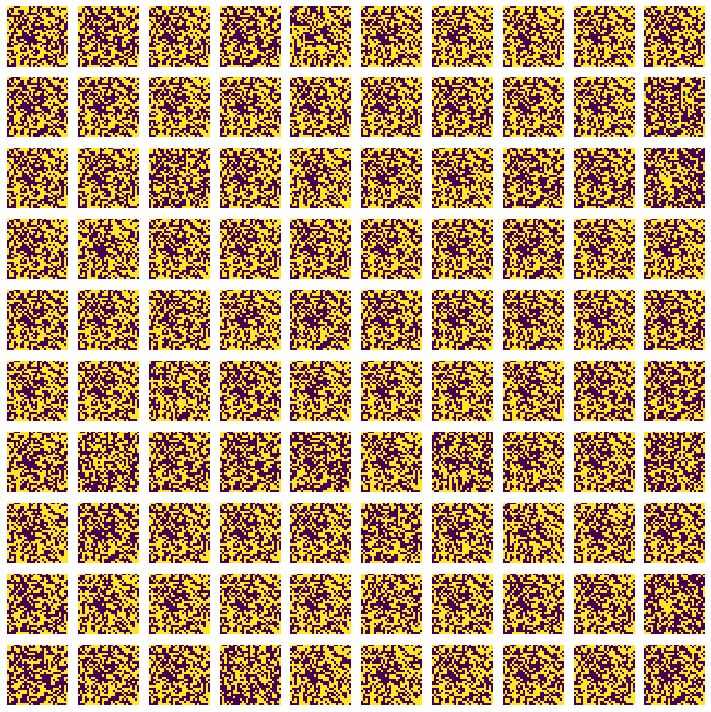

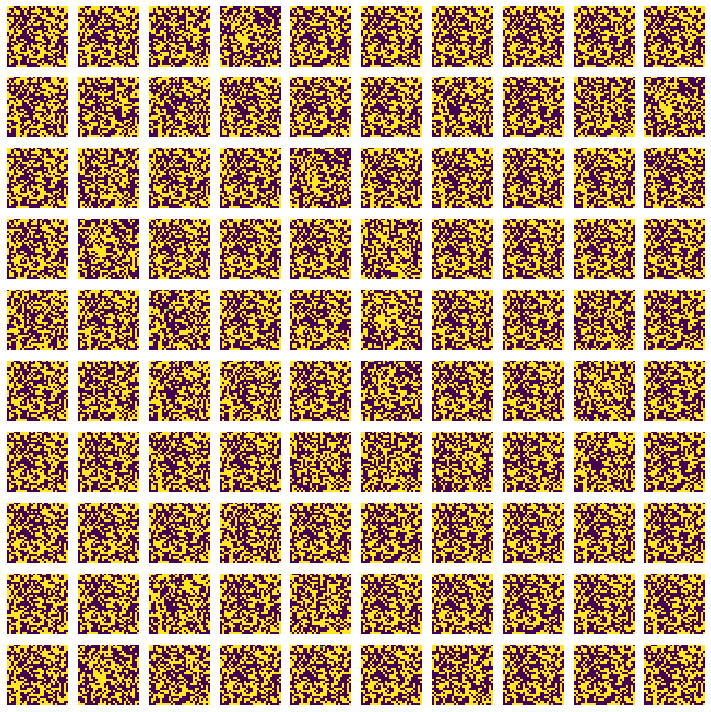

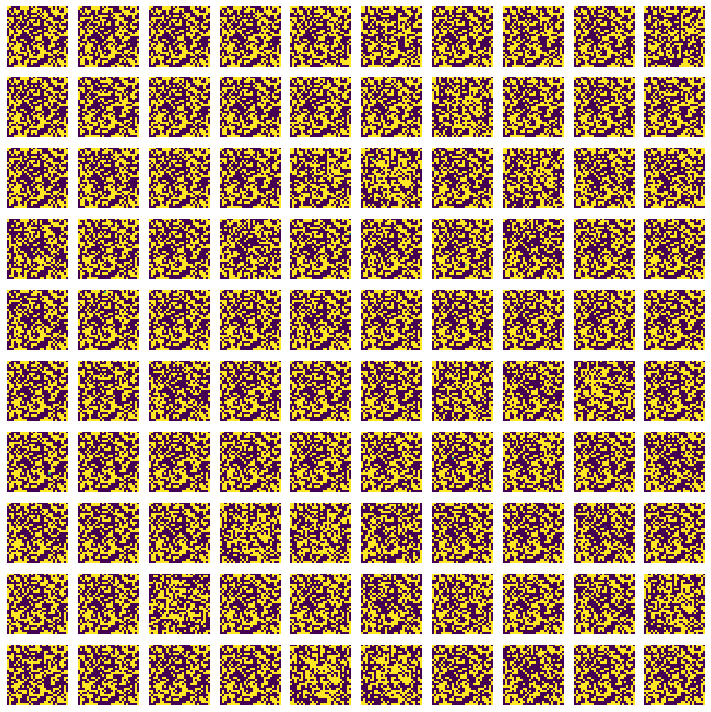

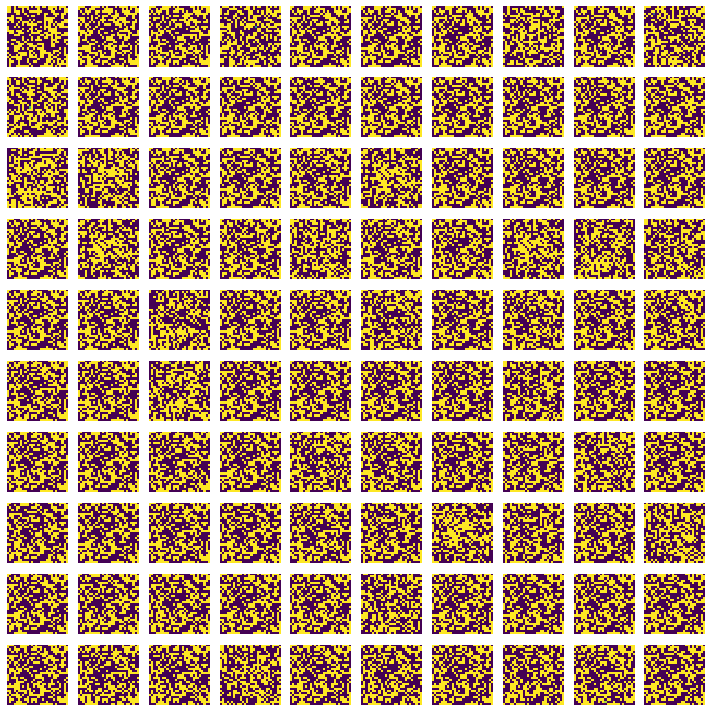

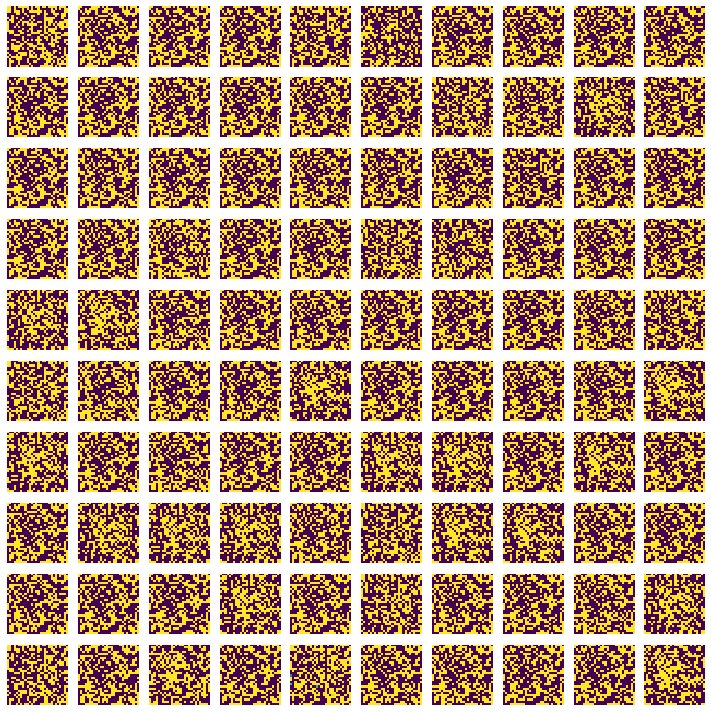

In [31]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
           
            plot_generated_images(e, generator)

training(600,128)




